Comparison: Year 2015, Old: 202007Cp2 New:202007D-nociliates

In [74]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

In [75]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
tmask = mesh['tmask']
deptht = mesh['gdept_1d'][0]

In [76]:
year = '2015'
olddir = '202007/202007C-p2/'
newdir = '202007/202007D-nociliates/'

In [181]:
def surface_plots(tracers, file, month, cmap, cdiff, vmax, vmin, dvmax, twoD=False, olddir=olddir, zoom=[0, 0, 0, 0], dl=0, dosum=False):
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))

    dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')

    if dosum:
        dm['summed'] = 0.*dm[tracers[0]]
        for tr in tracers:
            dm['summed'] = dm['summed'] + dm[tr]
        tracer = 'summed'
    else:
        tracer = tracers
    
    if twoD:
        mean_field = np.ma.array(dm[tracer][0], mask=1-tmask[0, 0])
    else:
        mean_field = np.ma.array(dm[tracer][0, dl], mask=1-tmask[0, dl])
    colours = axs[0].pcolormesh(mean_field, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title(olddir)
    fig.colorbar(colours, ax=axs[0])
    
    ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    
    if dosum:
        ds['summed'] = 0.*ds[tracers[0]]
        for tr in tracers:
            ds['summed'] = ds['summed'] + ds[tr]
    
    if twoD:
        field = np.ma.array(ds[tracer][0], mask=1-tmask[0,0])
    else:
        field = np.ma.array(ds[tracer][0, dl], mask=1-tmask[0, dl])
    colours = axs[1].pcolormesh(field, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title(newdir)
    fig.colorbar(colours, ax=axs[1])
    
    colours = axs[2].pcolormesh(field-mean_field, cmap=cdiff, vmax=dvmax, vmin=-dvmax)
    axs[2].set_title("New - Old")
    fig.colorbar(colours, ax=axs[2])
    ds.close()
    dm.close()


    for ax in axs:
        viz_tools.set_aspect(ax)
        if sum(zoom) > 0:
            ax.set_ylim(zoom[0], zoom[1])
            ax.set_xlim(zoom[2], zoom[3])

    return fig

In [183]:
def profiles(tracers, file, olddir=olddir, dosum=False):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    
    if dosum:
        dm['summed'] = 0.*dm[tracers[0]]
        for tr in tracers:
            dm['summed'] = dm['summed'] + dm[tr]
        tracer = 'summed'
    else:
        tracer = tracers
    
    
    mean_field = np.ma.array(dm[tracer][0], mask=1-tmask[0])
    axs[0].plot(mean_field.mean(axis=1).mean(axis=1), deptht, linewidth=2, label='Old')
    axs[1].plot(np.zeros_like(deptht), deptht, linewidth=2, label='Old')
    
    ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    
    if dosum:
        ds['summed'] = 0.*ds[tracers[0]]
        for tr in tracers:
            ds['summed'] = ds['summed'] + ds[tr]

    field = np.ma.array(ds[tracer][0], mask=1-tmask[0])
    axs[0].plot(field.mean(axis=1).mean(axis=1), deptht, label='New')
    
    axs[1].plot((field-mean_field).mean(axis=1).mean(axis=1), deptht, label='New')
    print (mean_field.mean(axis=1).mean(axis=1).max(), field.mean(axis=1).mean(axis=1).max())
    ds.close()
    dm.close()

    
    axs[0].invert_yaxis()
    axs[0].legend(loc='best')
    
    axs[1].invert_yaxis()
    axs[1].legend(loc='best')
    
    return fig

In [187]:
def thalweg_plots(tracers, file, cmap, cdiff, vmax, vmin, dvmax, olddir=olddir, maxdepth=0, dosum=False):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    
    if dosum:
        dm['summed'] = 0.*dm[tracers[0]]
        for tr in tracers:
            dm['summed'] = dm['summed'] + dm[tr]
        tracer = 'summed'
    else:
        tracer = tracers
        
    mean_field = np.array(dm[tracer][0])
    colours = vis.contour_thalweg(axs[0], mean_field, bathy, mesh,np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), cmap=cmap)
    axs[0].set_title(olddir)

    ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    
    if dosum:
        ds['summed'] = 0.*ds[tracers[0]]
        for tr in tracers:
            ds['summed'] = ds['summed'] + ds[tr]

    field = np.array(ds[tracer][0])
    colours = vis.contour_thalweg(axs[1], field, bathy, mesh,np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), cmap=cmap)

    axs[1].set_title(newdir)
    colours = vis.contour_thalweg(axs[2], field-mean_field, bathy, mesh, np.arange(-dvmax, 1.2*dvmax, dvmax/5), 
                                      cmap=cdiff)
 
    axs[2].set_title('New - Old')
    if maxdepth > 0:
        for ax in axs:
            ax.set_ylim(maxdepth, 0)
    ds.close()
    dm.close()

    fig.tight_layout()
    return fig

## January: Temperature

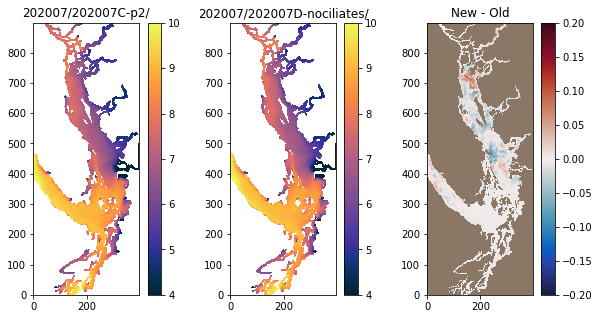

In [80]:
tracer = 'votemper'
file = 'grid'
month = '01'
cmap = cm.thermal
cdiff = cm.balance
vmax = 10
vmin = 4
dvmax = 0.2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

9.571470076159912 9.57188570425047


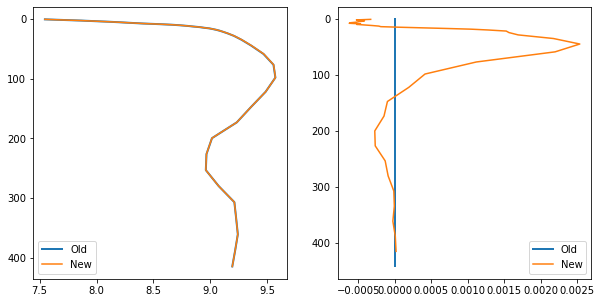

In [81]:
fig = profiles(tracer, file)

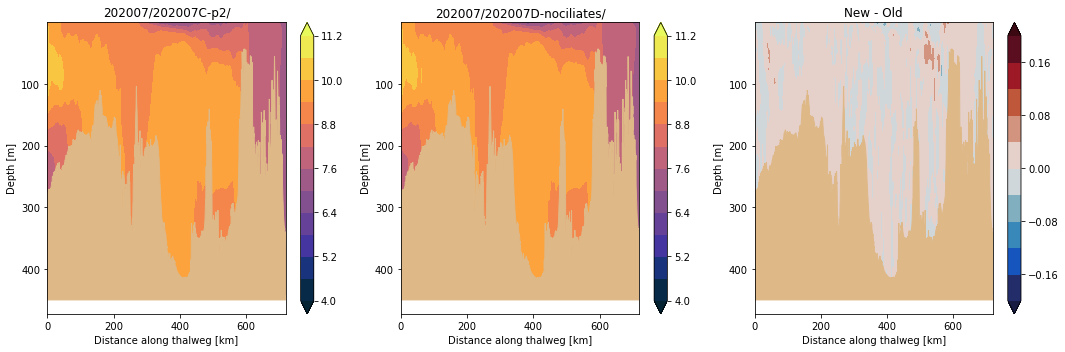

In [82]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## January: Ciliates

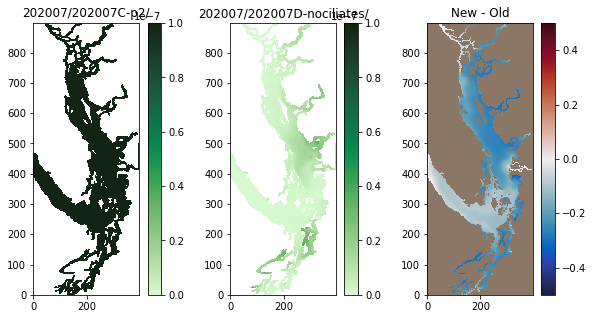

In [83]:
tracer = 'ciliates'
file = 'ptrc'
month = '01'
cmap = cm.algae
cdiff = cm.balance
vmax = 1e-7
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.1495710606810204 4.968160763939924e-09


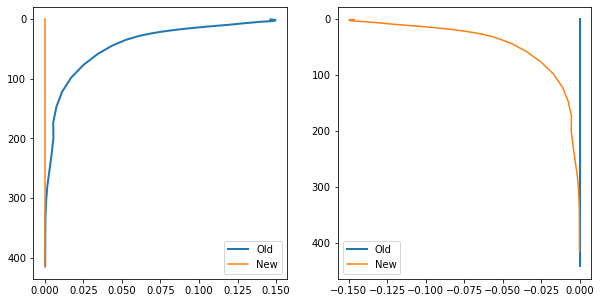

In [84]:
fig = profiles(tracer, file)

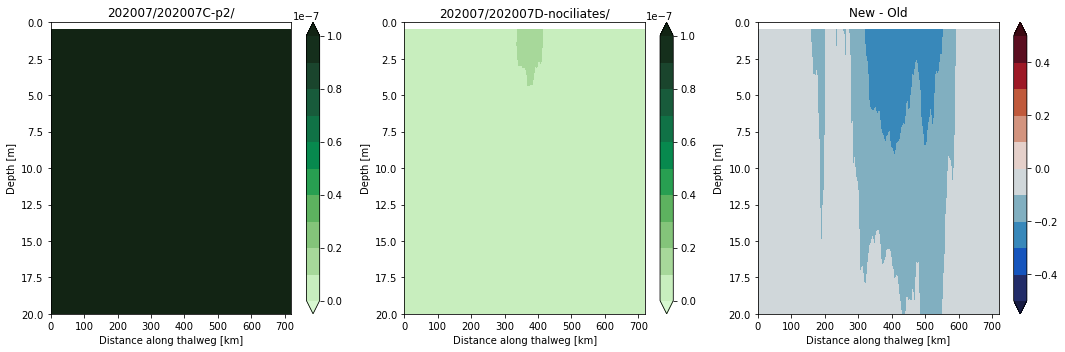

In [85]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, maxdepth=20)

## January Total Phyto

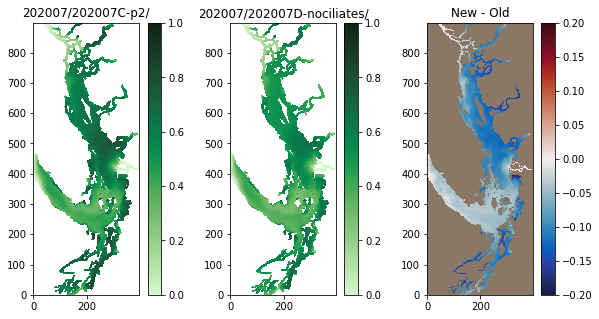

In [182]:
tracer = ['diatoms', 'flagellates', 'ciliates']
file = 'ptrc'
month = '01'
dosum = True
cmap = cm.algae
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

0.4786479455620093 0.41313094636458436


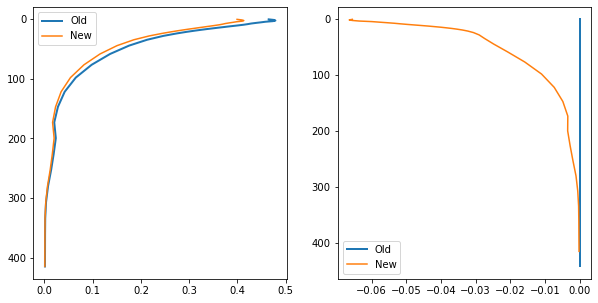

In [184]:
fig = profiles(tracer, file, dosum=dosum)

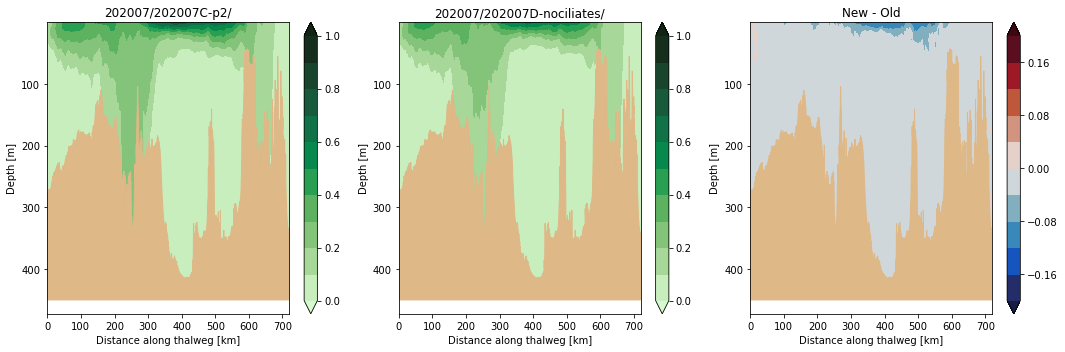

In [188]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

## February: Nitrate

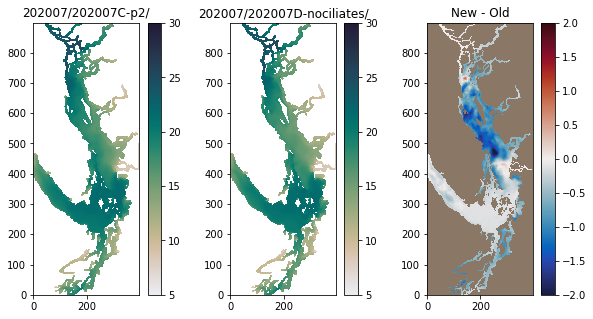

In [86]:
tracer = 'nitrate'
file = 'ptrc'
month = '02'
cmap = cm.rain
cdiff = cm.balance
vmax = 30
vmin = 5
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

29.105660952634405 29.105100104710946


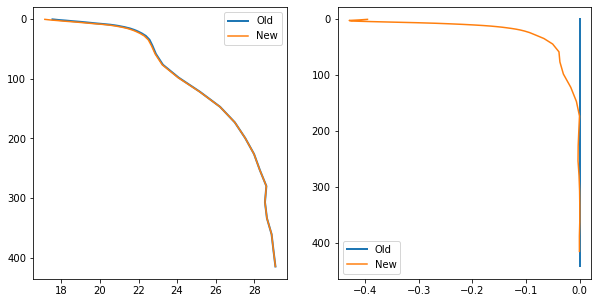

In [87]:
fig = profiles(tracer, file)

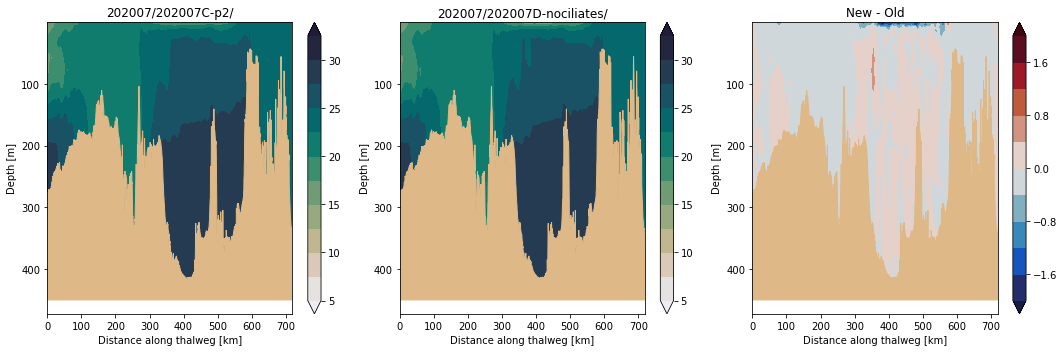

In [88]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## February: Flagellates

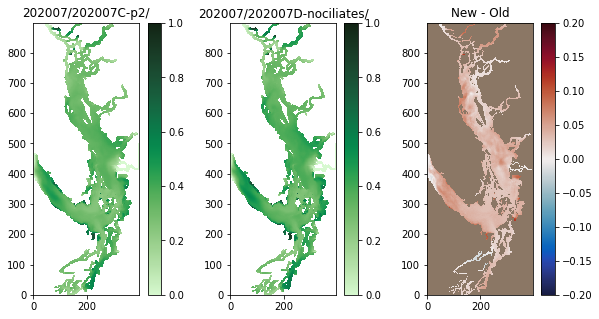

In [89]:
tracer = 'flagellates'
file = 'ptrc'
month = '02'
cmap = cm.algae
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.31901974750184875 0.3514677916934172


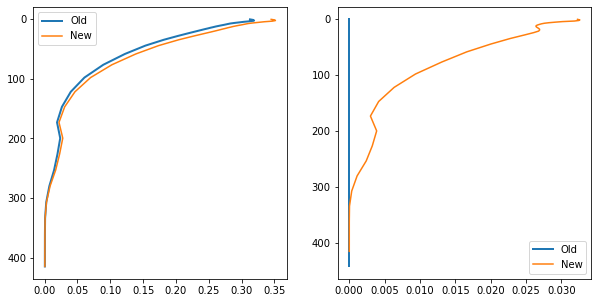

In [90]:
fig = profiles(tracer, file)

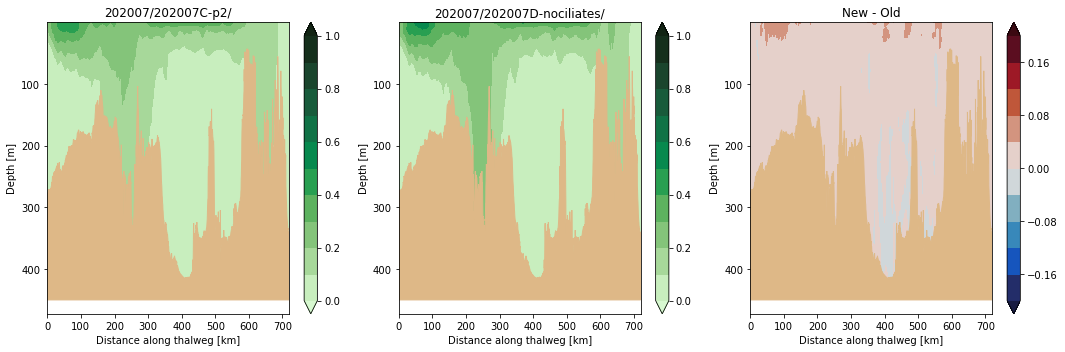

In [91]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## February: Diatoms

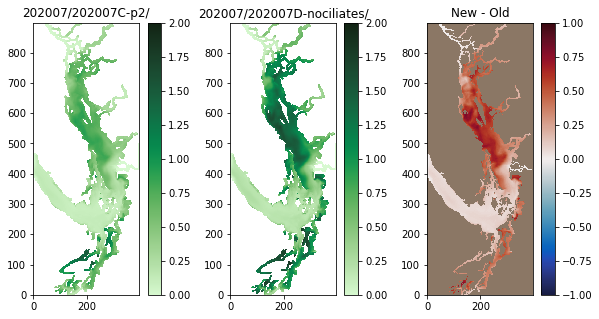

In [92]:
tracer = 'diatoms'
file = 'ptrc'
month = '02'
cmap = cm.algae
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.38938158910358 0.662416323546096


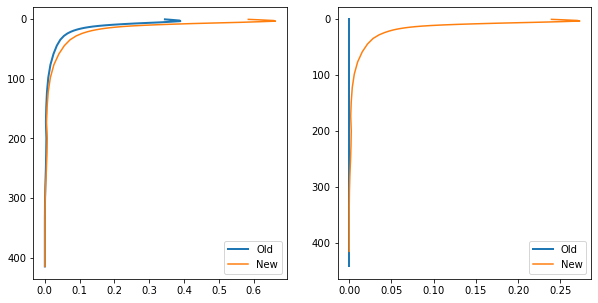

In [93]:
fig = profiles(tracer, file)

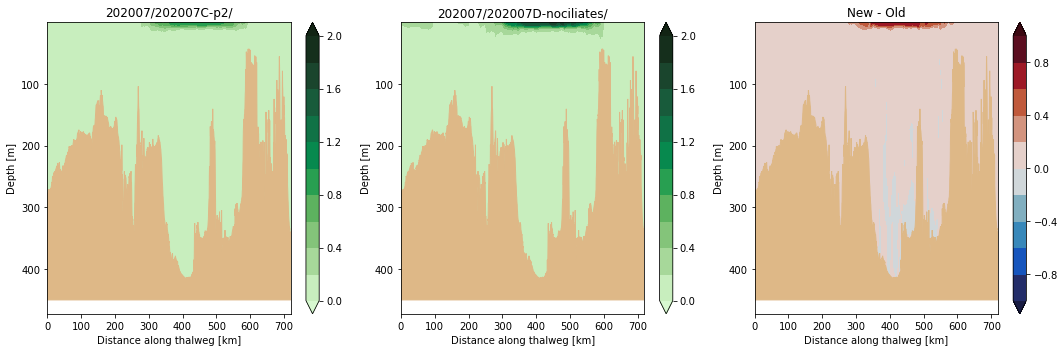

In [94]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

### February Ciliates

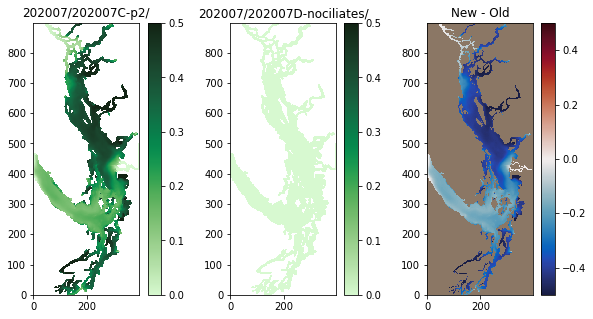

In [95]:
tracer = 'ciliates'
file = 'ptrc'
month = '02'
cmap = cm.algae
cdiff = cm.balance
vmax = 0.5
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.2524077730290156 1.4388070559191671e-07


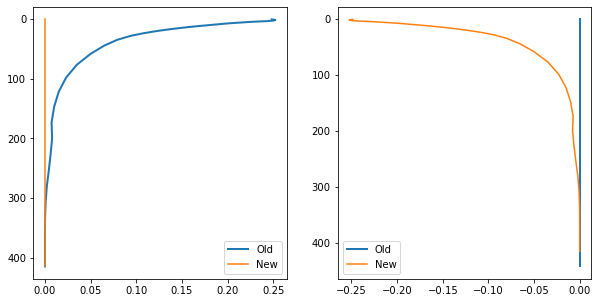

In [96]:
fig = profiles(tracer, file)

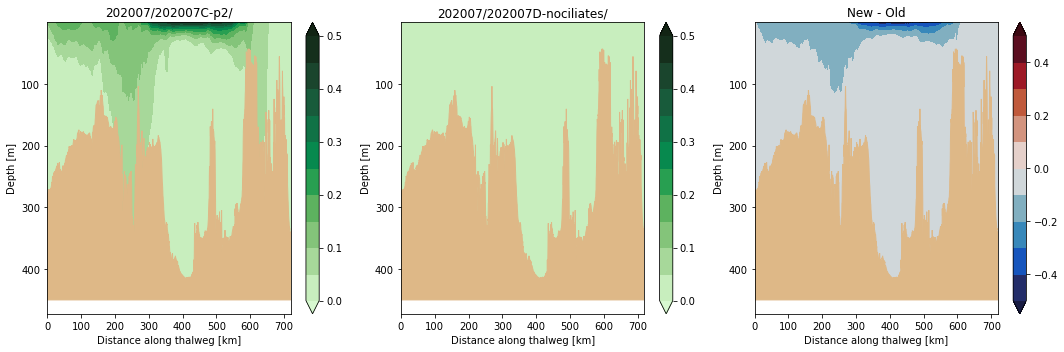

In [97]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

### February Microzoo

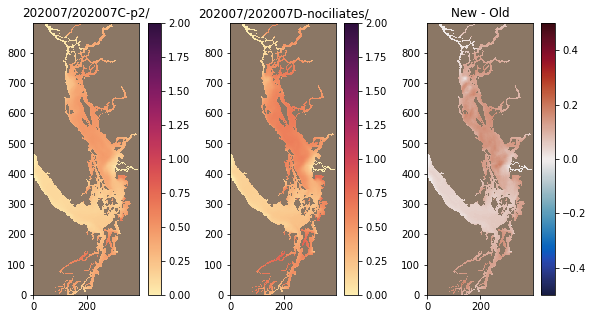

In [98]:
tracer = 'microzooplankton'
file = 'ptrc'
month = '02'
cmap = cm.matter
cmap.set_bad('#8b7765')
cb1 = "Microzooplankton (uM N)"
cdiff = cm.balance
cdiff.set_bad('#8b7765')
cb2 = 'Microzooplankton (uM N)'
vmax = 2
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.2631453612312097 0.34784554714929344


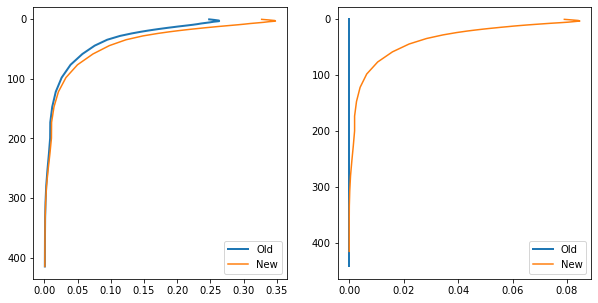

In [99]:
fig = profiles(tracer, file)

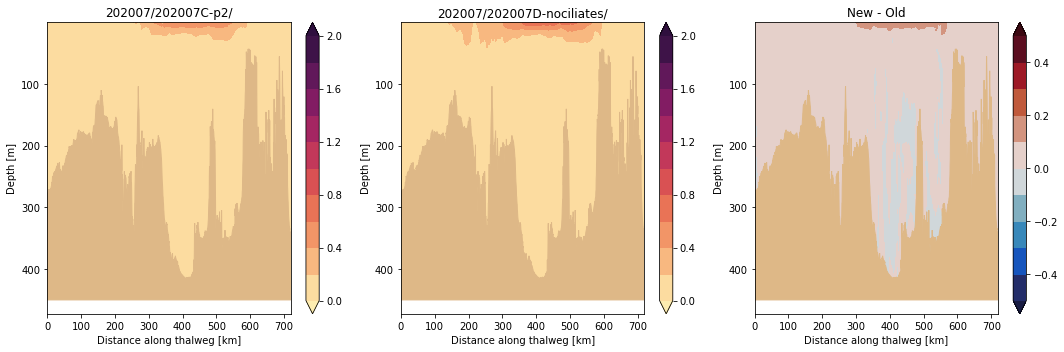

In [100]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## February Total Phyto

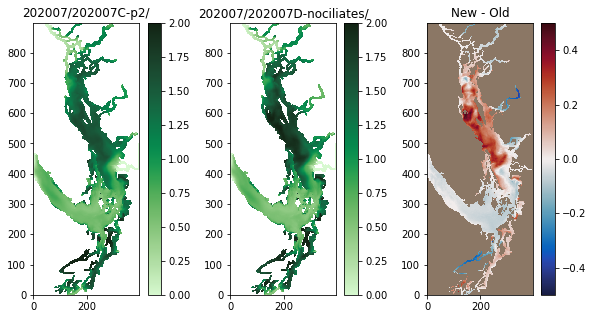

In [190]:
tracer = ['diatoms', 'flagellates', 'ciliates']
file = 'ptrc'
month = '02'
dosum = True
cmap = cm.algae
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

0.9566707019742019 1.0091611325422998


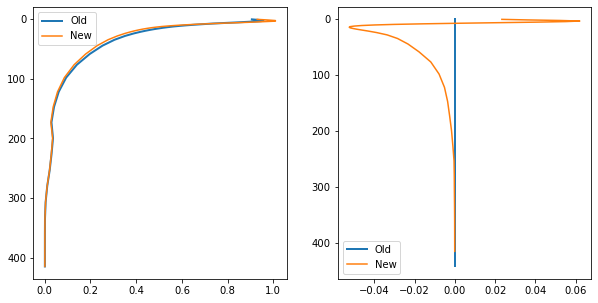

In [191]:
fig = profiles(tracer, file, dosum=dosum)

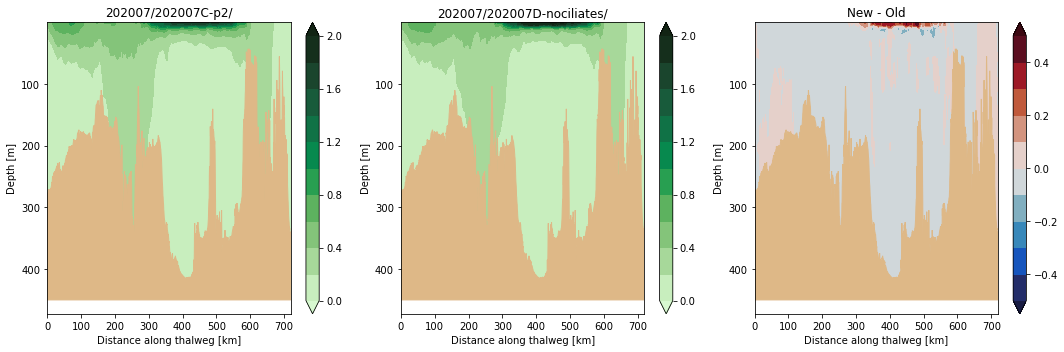

In [192]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

## March: Diatoms

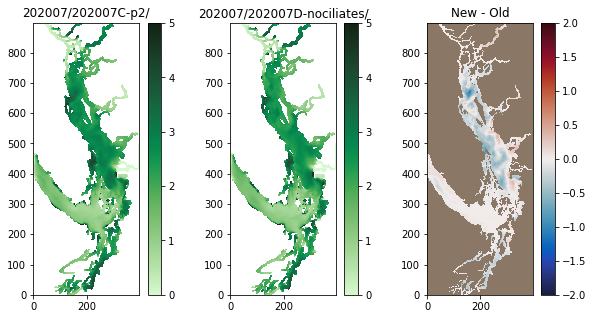

In [101]:
tracer = 'diatoms'
file = 'ptrc'
month = '03'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

1.9909349299171926 1.9217415130505544


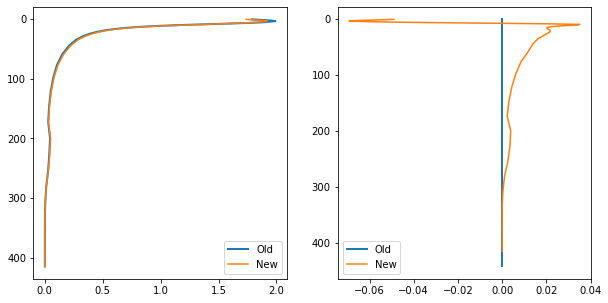

In [102]:
fig = profiles(tracer, file)

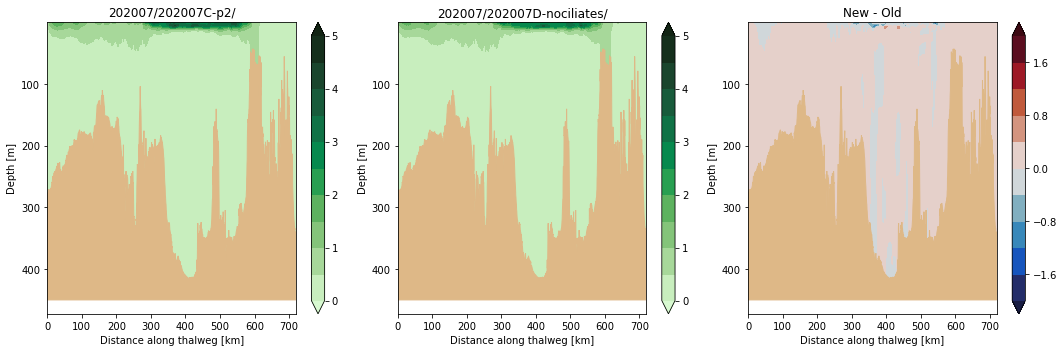

In [103]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## March: Flagellates

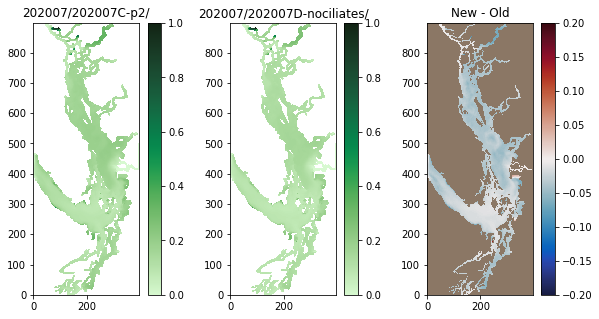

In [104]:
tracer = 'flagellates'
file = 'ptrc'
month = '03'
cmap = cm.algae
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.14053983657080382 0.11187708004567778


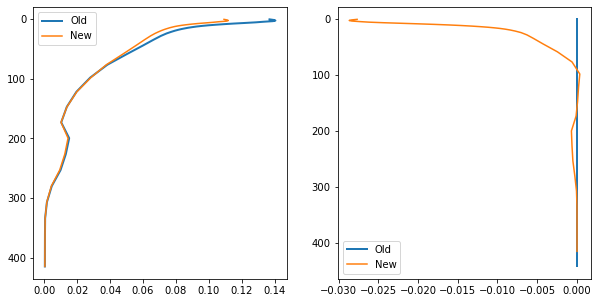

In [105]:
fig = profiles(tracer, file)

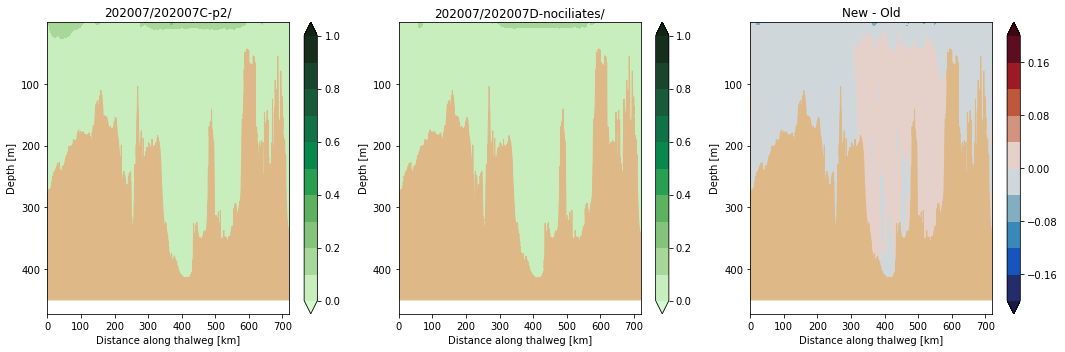

In [106]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## March Ciliates

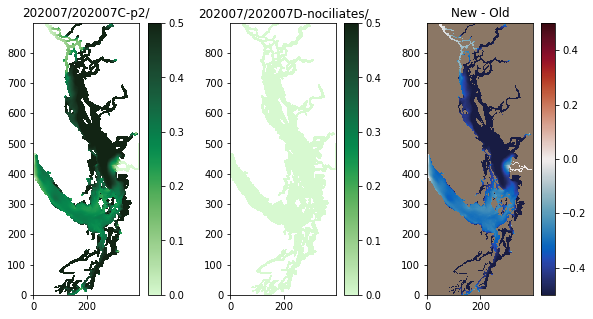

In [107]:
tracer = 'ciliates'
file = 'ptrc'
month = '03'
cmap = cm.algae
cdiff = cm.balance
vmax = 0.5
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.3733121692111687 3.8867110516648234e-05


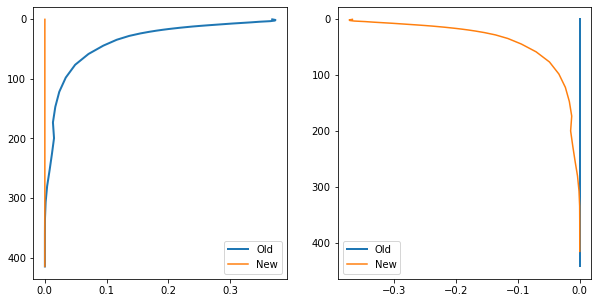

In [108]:
fig = profiles(tracer, file)

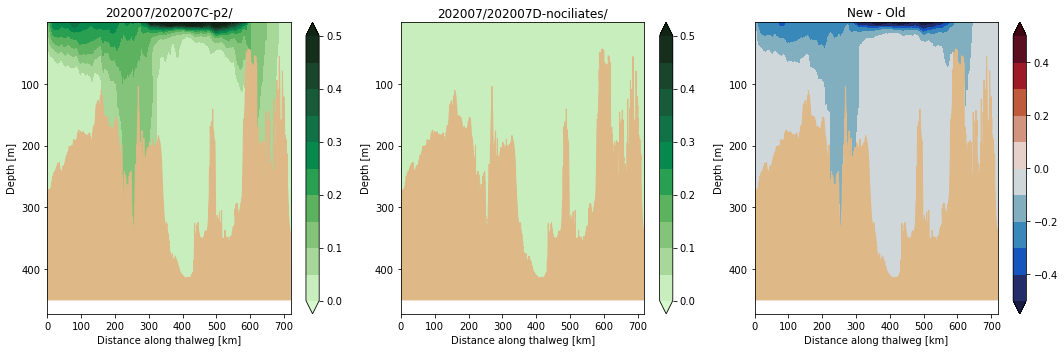

In [109]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## March Total Phyto

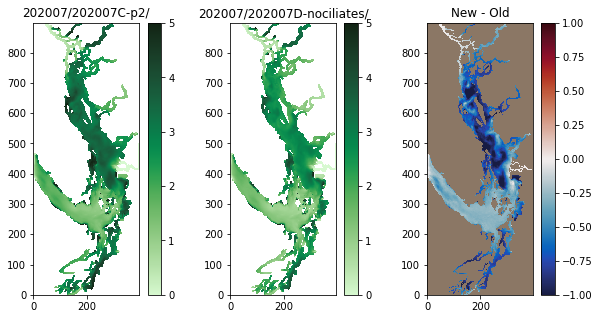

In [194]:
tracer = ['diatoms', 'flagellates', 'ciliates']
file = 'ptrc'
month = '03'
dosum = True
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

2.4952782367642894 2.032493580068364


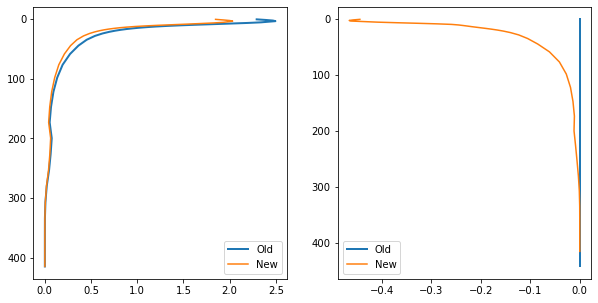

In [195]:
fig = profiles(tracer, file, dosum=dosum)

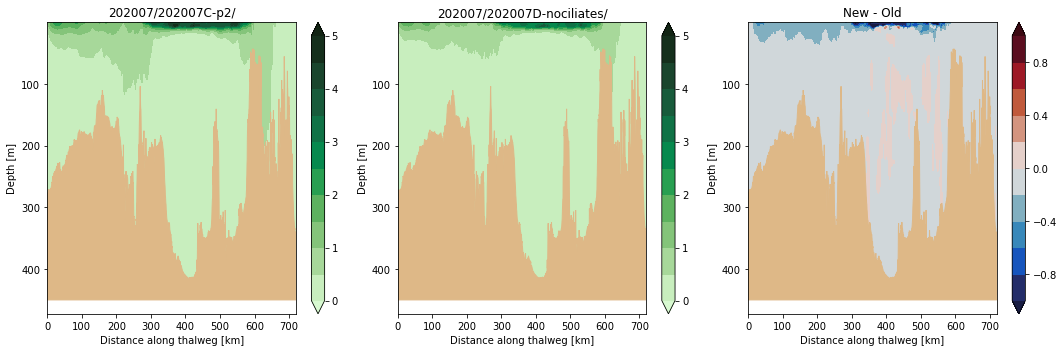

In [196]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

## April: Microzooplankton

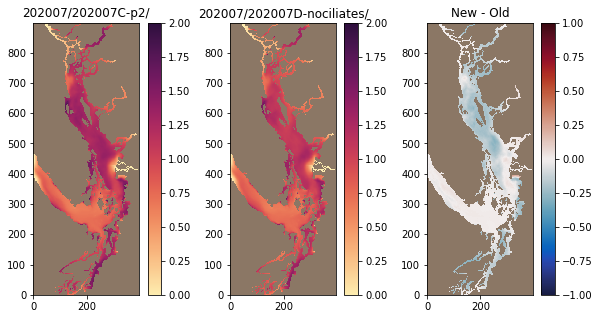

In [110]:
tracer = 'microzooplankton'
file = 'ptrc'
month = '04'
cmap = cm.matter
cmap.set_bad('#8b7765')
cb1 = "Microzooplankton (uM N)"
cdiff = cm.balance
cdiff.set_bad('#8b7765')
cb2 = 'Microzooplankton (uM N)'
vmax = 2
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.9129039241397264 0.8577263951539633


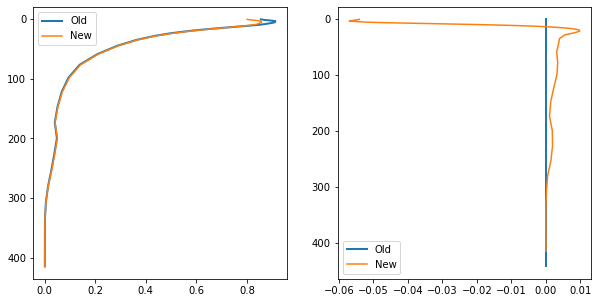

In [111]:
fig = profiles(tracer, file)

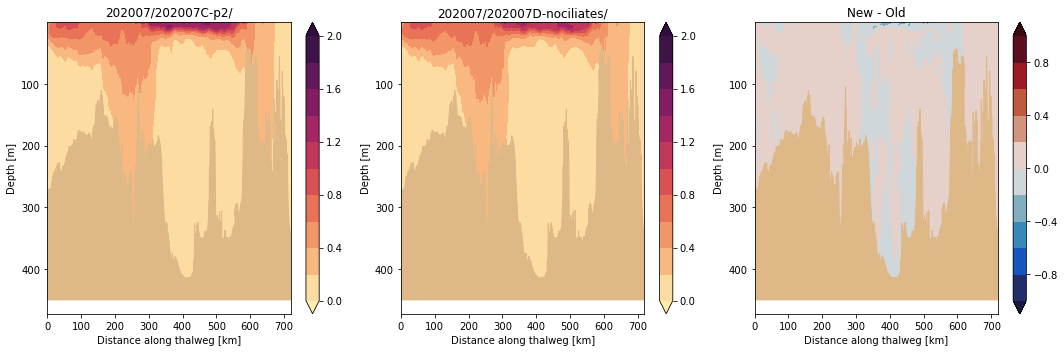

In [112]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## April Diatoms

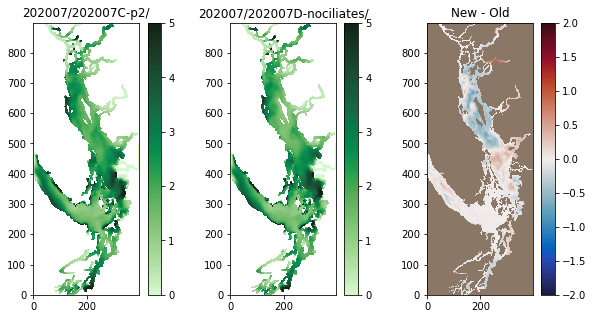

In [113]:
tracer = 'diatoms'
file = 'ptrc'
month = '04'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

2.104666207259762 2.076841236043735


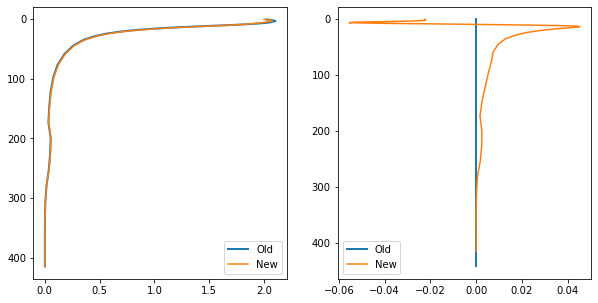

In [114]:
fig = profiles(tracer, file)

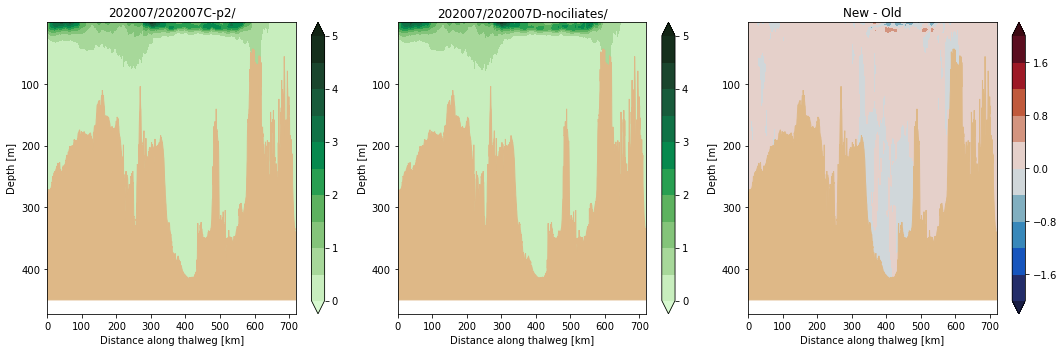

In [115]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## April Flagellates

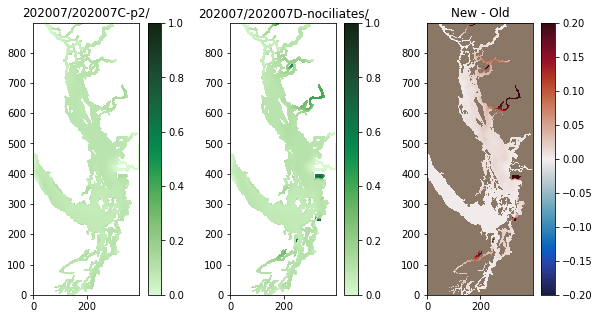

In [116]:
tracer = 'flagellates'
file = 'ptrc'
month = '04'
cmap = cm.algae
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.0770753153660169 0.09021831092052733


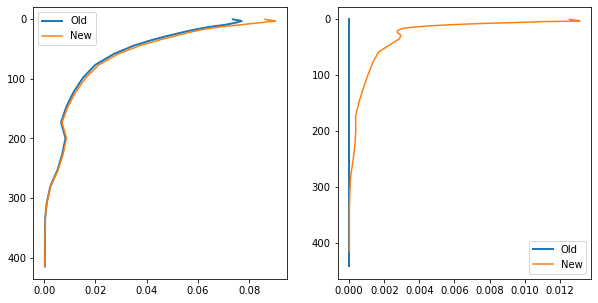

In [117]:
fig = profiles(tracer, file)

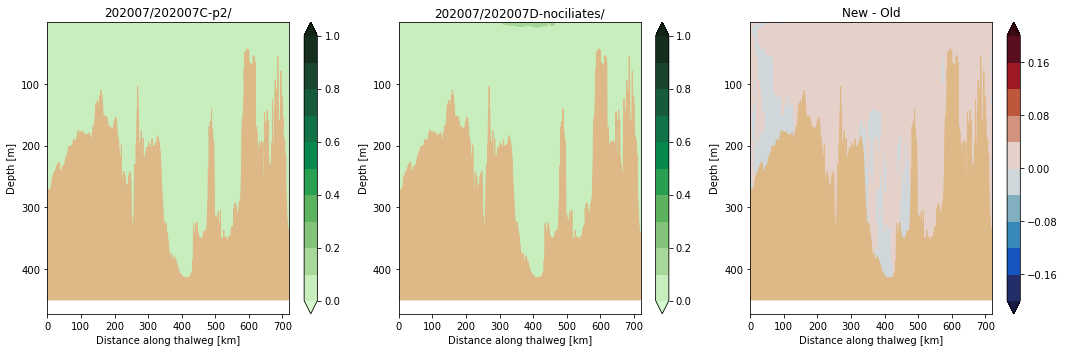

In [118]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## April Ciliates

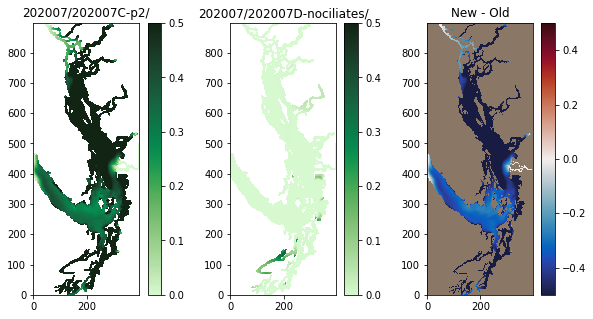

In [119]:
tracer = 'ciliates'
file = 'ptrc'
month = '04'
cmap = cm.algae
cdiff = cm.balance
vmax = 0.5
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.4311530906895547 0.005019581455642791


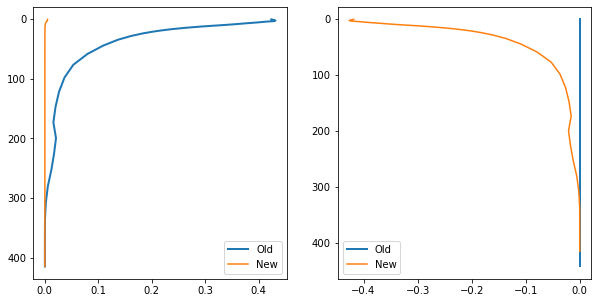

In [120]:
fig = profiles(tracer, file)

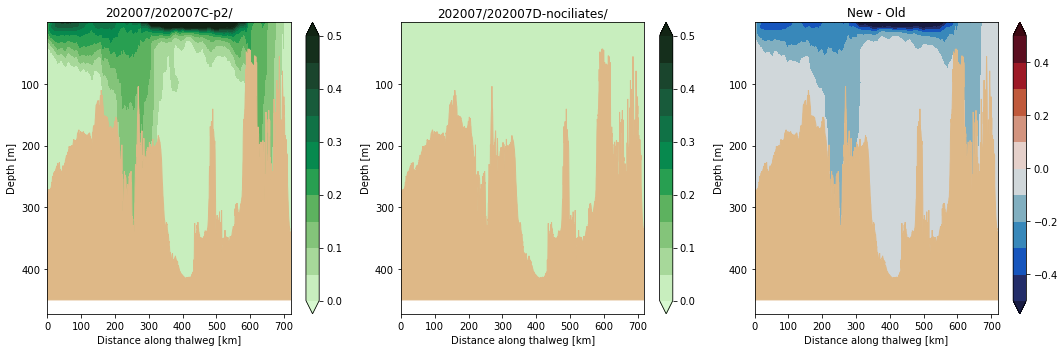

In [121]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## April Total Phyto

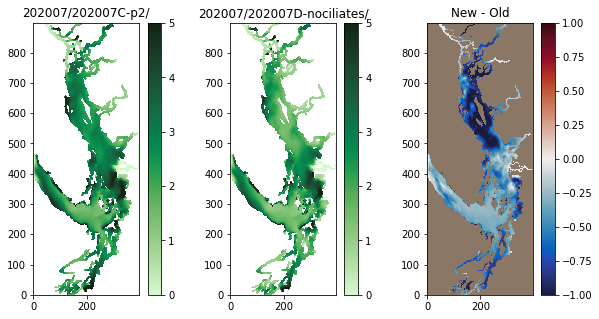

In [197]:
tracer = ['diatoms', 'flagellates', 'ciliates']
file = 'ptrc'
month = '04'
dosum = True
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

2.609281683547219 2.1711897957977535


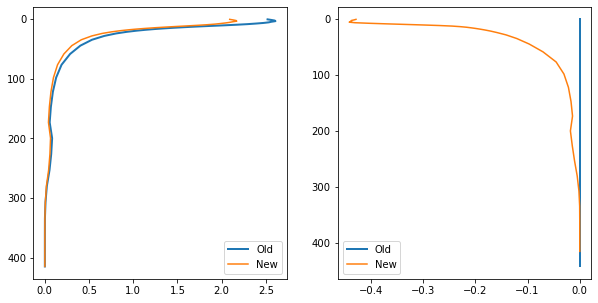

In [198]:
fig = profiles(tracer, file, dosum=dosum)

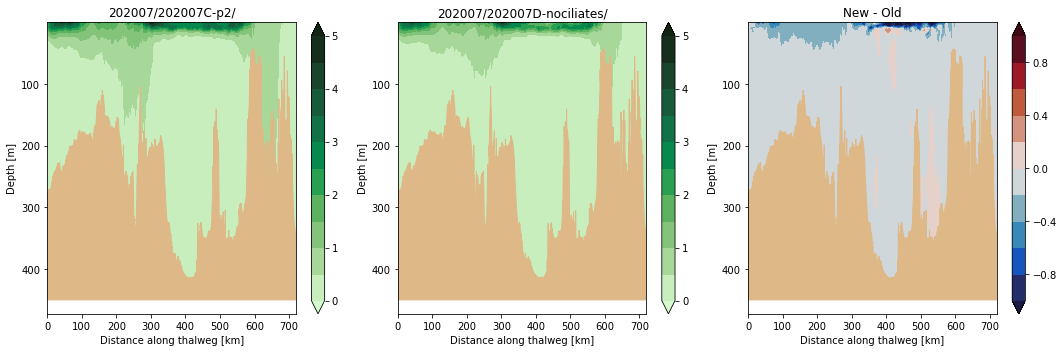

In [199]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

## May: Salinity

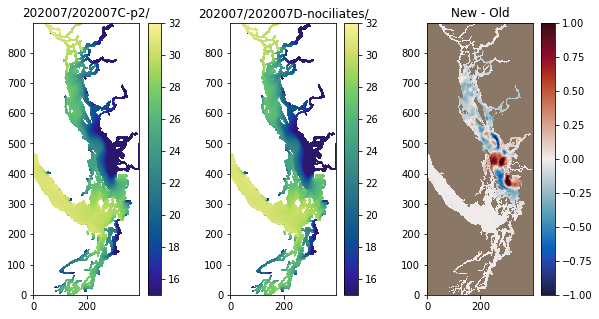

In [122]:
tracer = 'vosaline'
file = 'grid'
month = '05'
cmap = cm.haline
cdiff = cm.balance
vmax = 32
vmin = 15
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

31.800685885961084 31.802384827699626


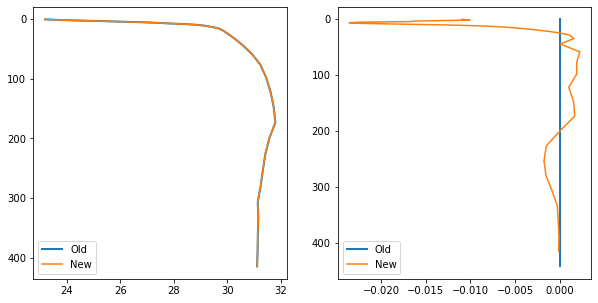

In [123]:
fig = profiles(tracer, file)

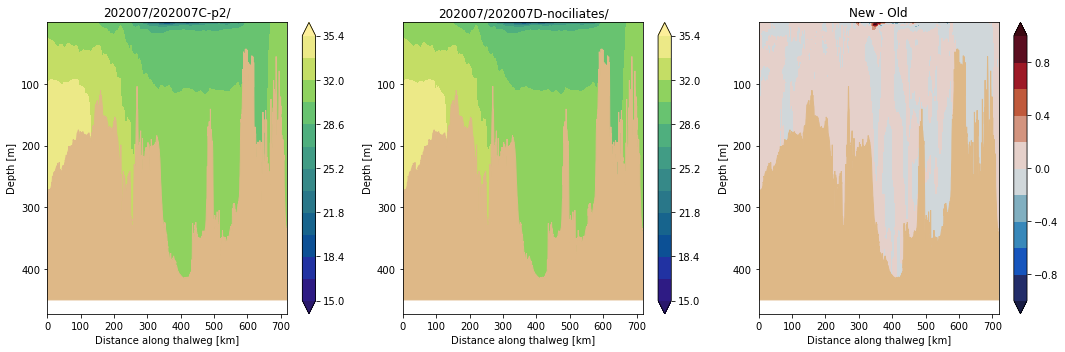

In [124]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## May Diatoms

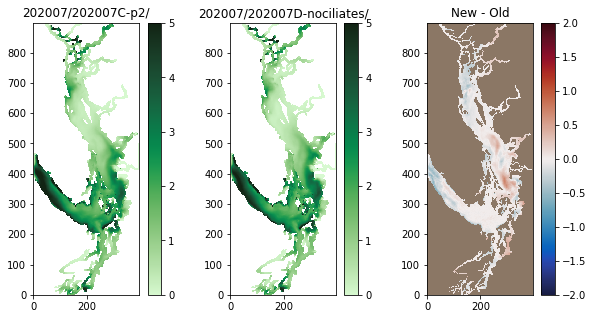

In [125]:
tracer = 'diatoms'
file = 'ptrc'
month = '05'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

2.077047469151581 2.0284477944053334


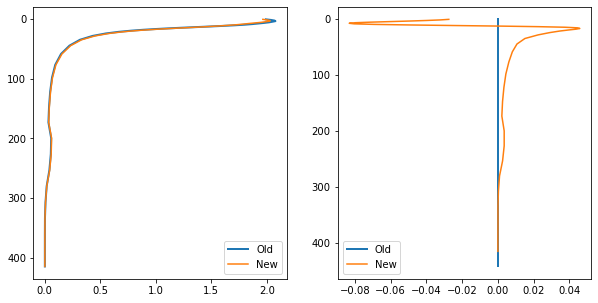

In [126]:
fig = profiles(tracer, file)

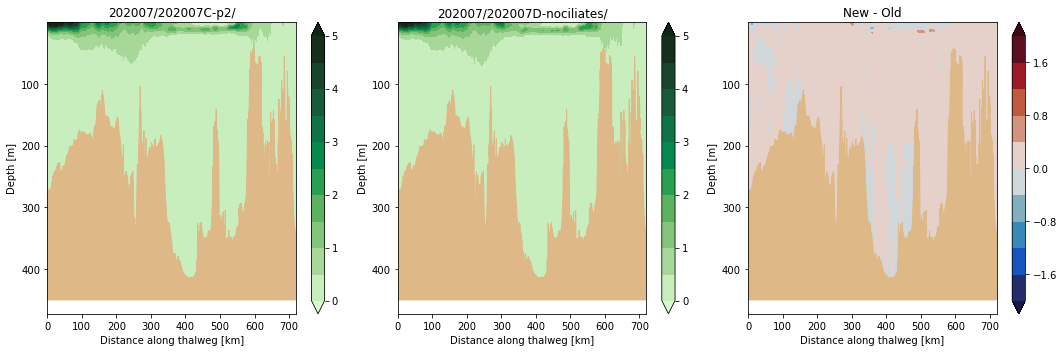

In [127]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## May Diatoms compared to H201812

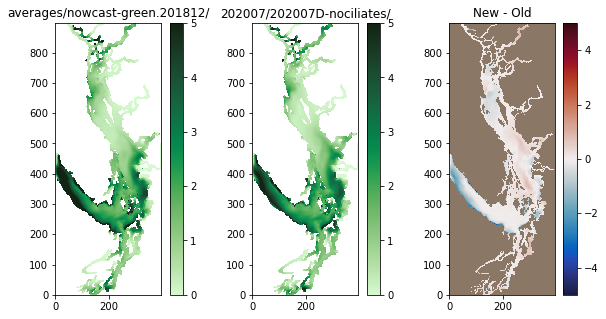

In [128]:
tracer = 'diatoms'
file = 'ptrc'
month = '05'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, 
                    olddir='averages/nowcast-green.201812/')

2.241305312051413 2.0284477944053334


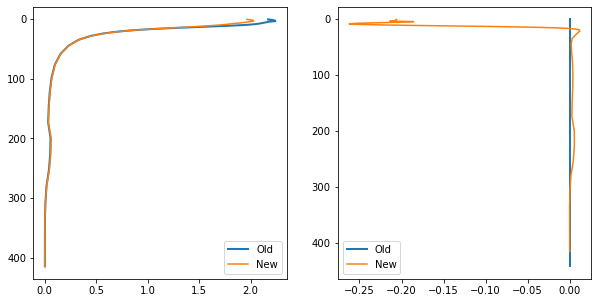

In [129]:
fig = profiles(tracer, file, olddir='averages/nowcast-green.201812/')

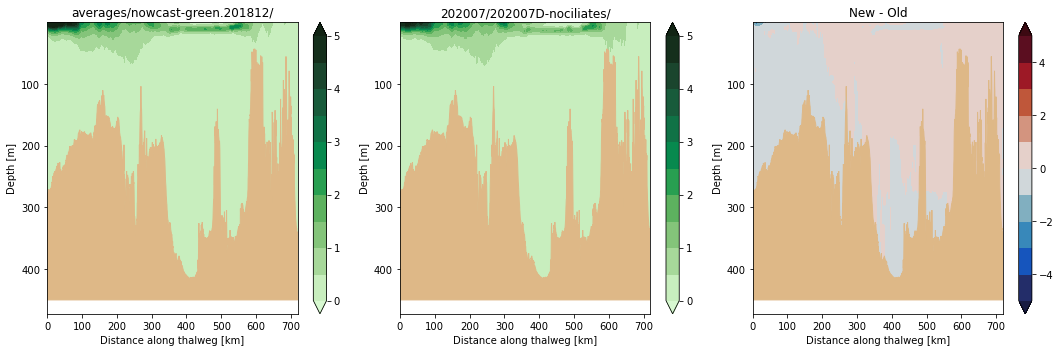

In [130]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/nowcast-green.201812/')

## May: Ciliates

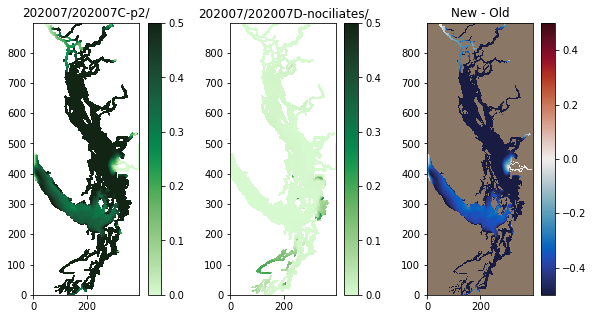

In [131]:
tracer = 'ciliates'
file = 'ptrc'
month = '05'
cmap = cm.algae
cdiff = cm.balance
vmax = 0.5
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.5601771004569983 0.010087400084497326


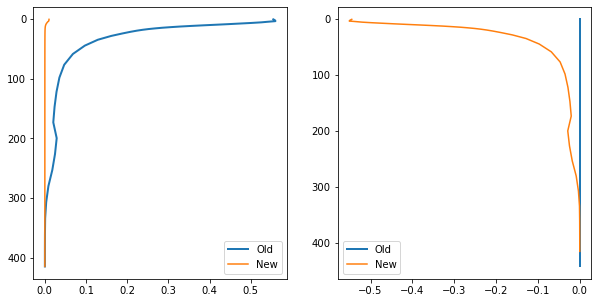

In [132]:
fig = profiles(tracer, file)

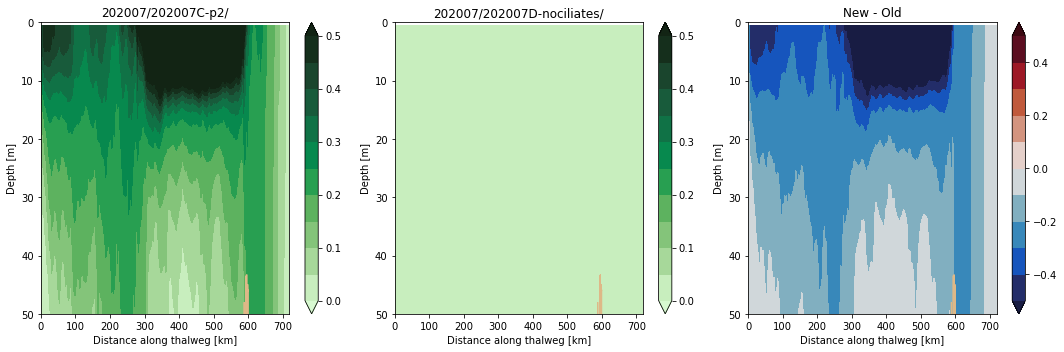

In [133]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, maxdepth=50)

## May Total Phyto

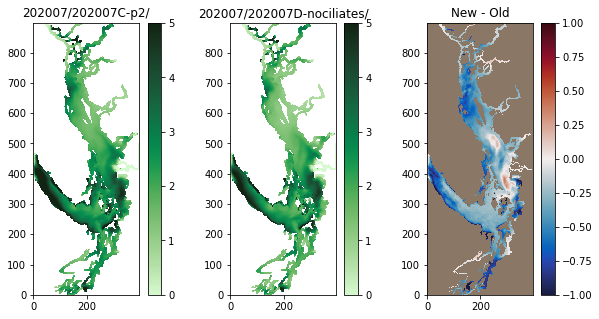

In [201]:
tracer = ['diatoms', 'flagellates', 'ciliates']
file = 'ptrc'
month = '05'
dosum = True
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

2.872852859452842 2.516676542658505


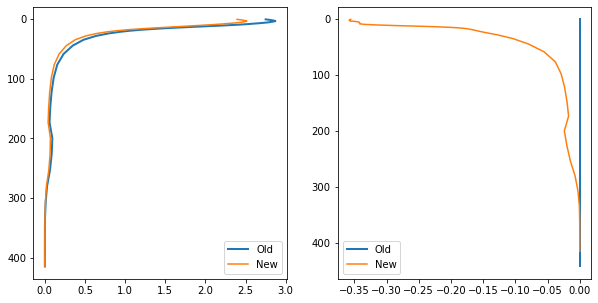

In [205]:
fig = profiles(tracer, file, dosum=dosum)

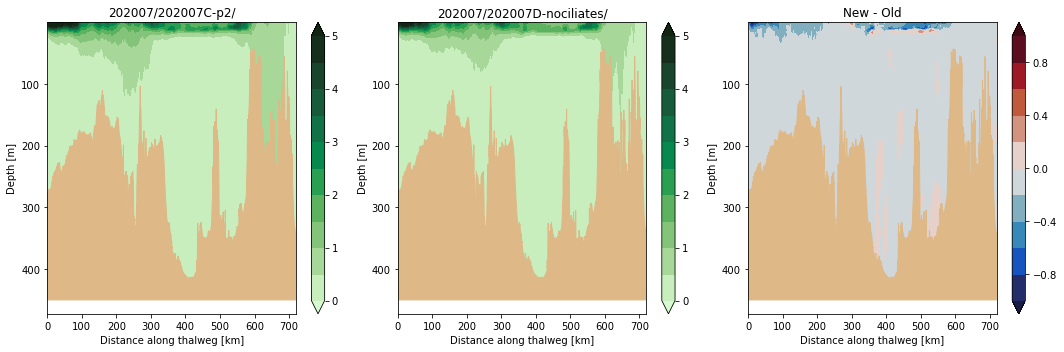

In [206]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

## May total Phyto Compared to H201812

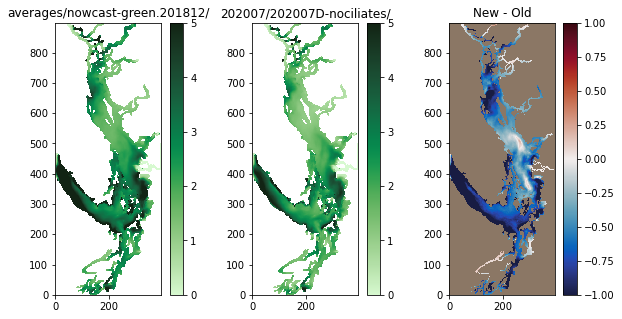

In [204]:
tracer = ['diatoms', 'flagellates', 'ciliates']
file = 'ptrc'
month = '05'
dosum = True
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum, olddir='averages/nowcast-green.201812/')

3.39088125393462 2.516676542658505


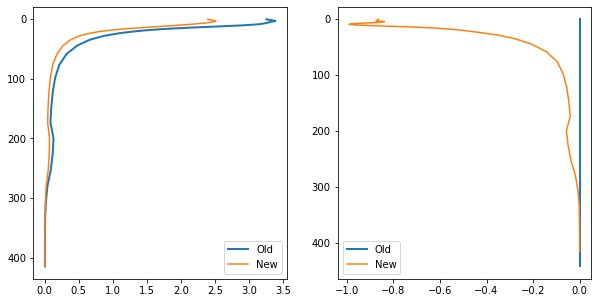

In [207]:
fig = profiles(tracer, file, dosum=dosum, olddir='averages/nowcast-green.201812/')

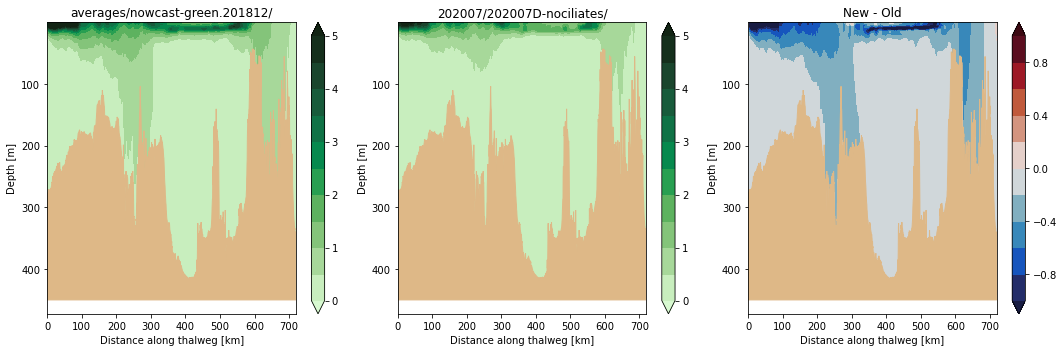

In [208]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum, olddir='averages/nowcast-green.201812/')

## June: Flagellates

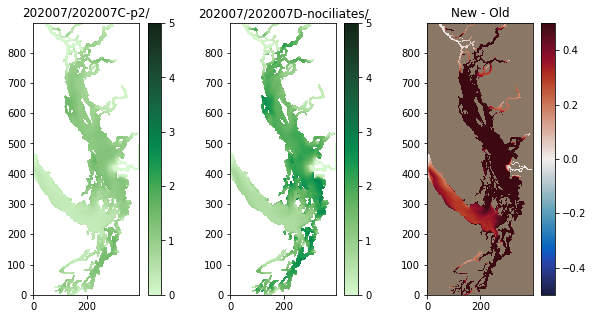

In [134]:
tracer = 'flagellates'
file = 'ptrc'
month = '06'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.7341814081816219 1.3387778740729852


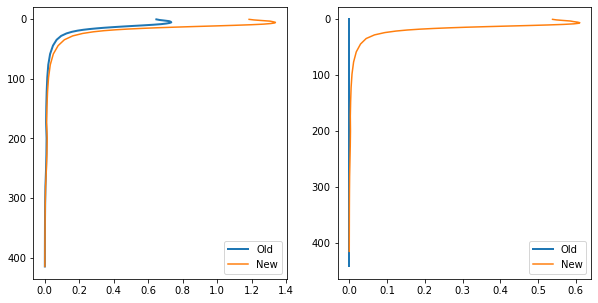

In [135]:
fig = profiles(tracer, file)

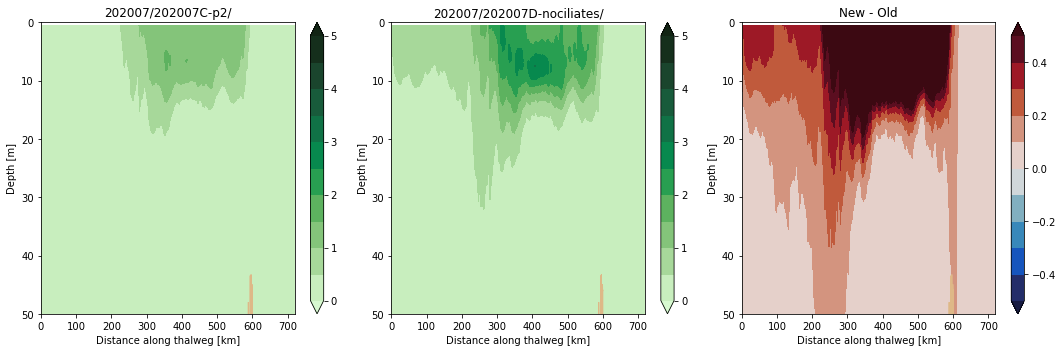

In [136]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, maxdepth=50)

## June Diatoms

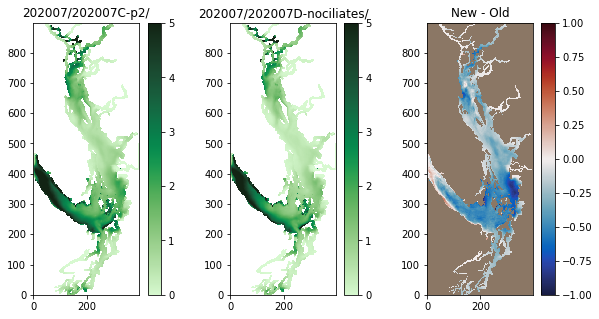

In [137]:
tracer = 'diatoms'
file = 'ptrc'
month = '06'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

2.0342604029186058 1.771060870626587


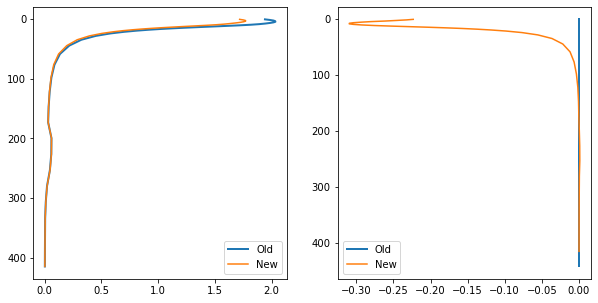

In [138]:
fig = profiles(tracer, file)

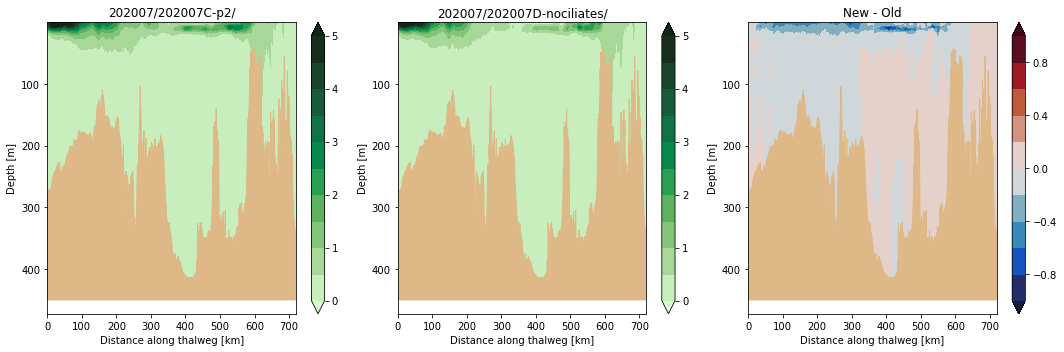

In [139]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## June Ciliates

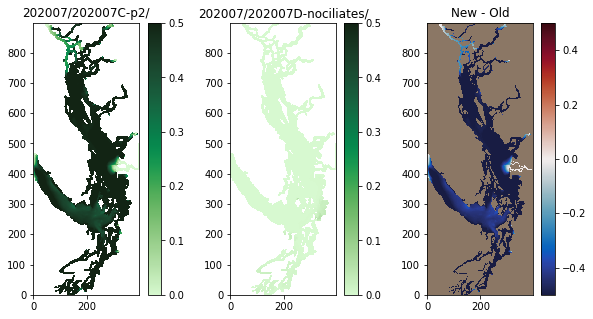

In [140]:
tracer = 'ciliates'
file = 'ptrc'
month = '06'
cmap = cm.algae
cdiff = cm.balance
vmax = 0.5
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.4770751999909796 0.002055900645487634


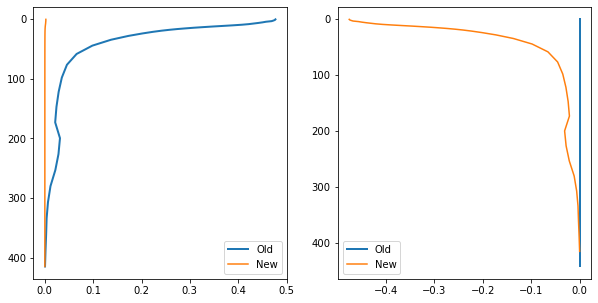

In [141]:
fig = profiles(tracer, file)

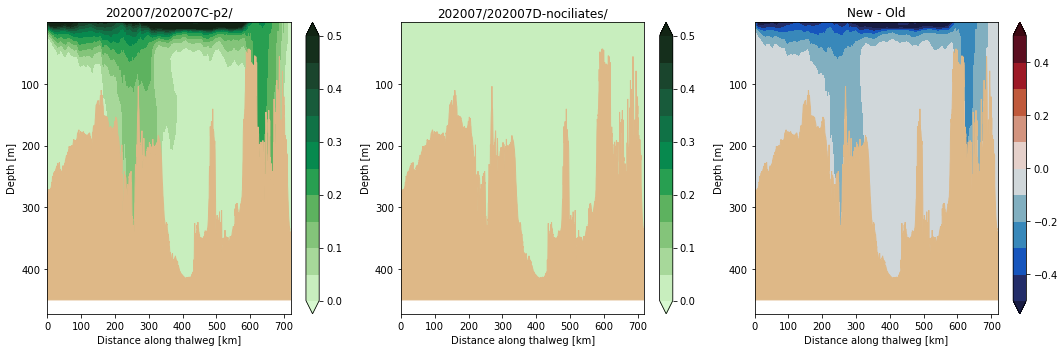

In [142]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## June Diatoms against 201812 Hindcast

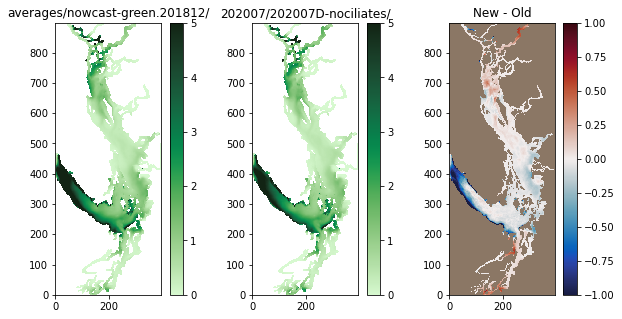

In [143]:
tracer = 'diatoms'
file = 'ptrc'
month = '06'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, 
                    olddir='averages/nowcast-green.201812/')

1.9365660122173116 1.771060870626587


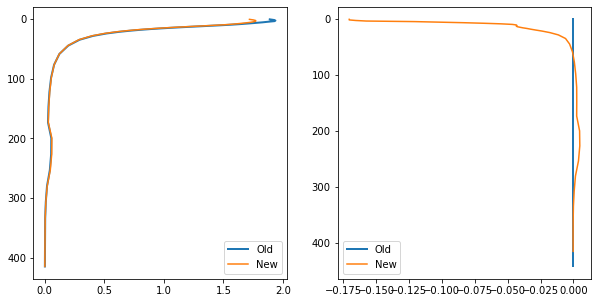

In [144]:
fig = profiles(tracer, file, olddir='averages/nowcast-green.201812/')

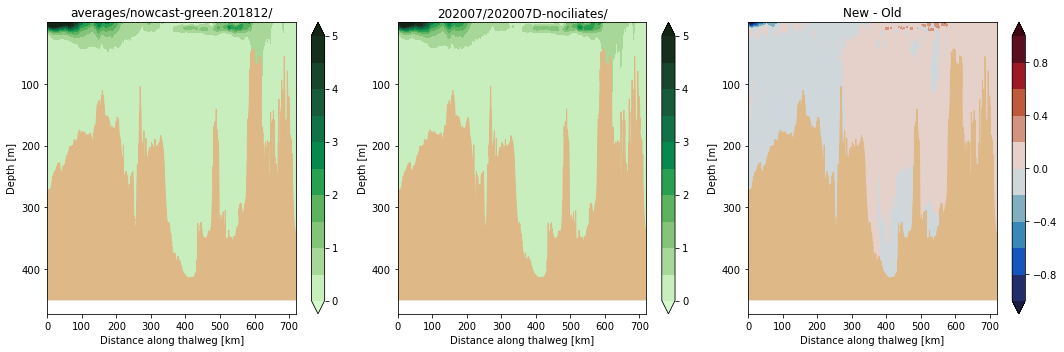

In [145]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, 
                    olddir='averages/nowcast-green.201812/')

## June Total Phyto

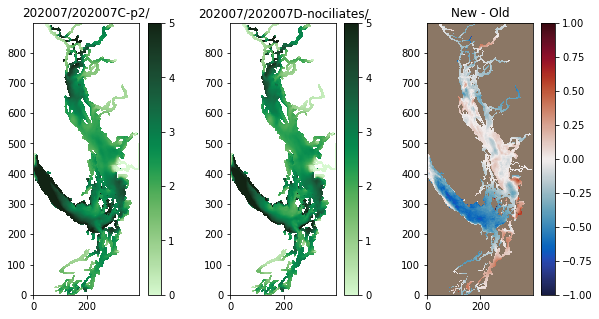

In [210]:
tracer = ['diatoms', 'flagellates', 'ciliates']
file = 'ptrc'
month = '06'
dosum = True
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

3.22299050700832 3.0809506441715477


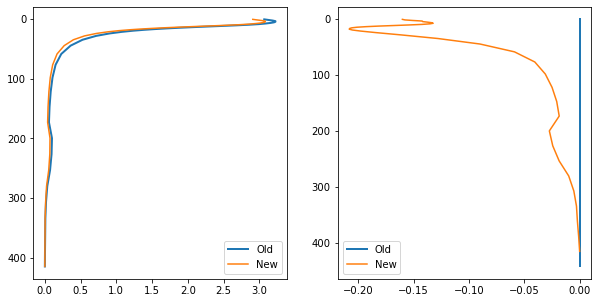

In [211]:
fig = profiles(tracer, file, dosum=dosum)

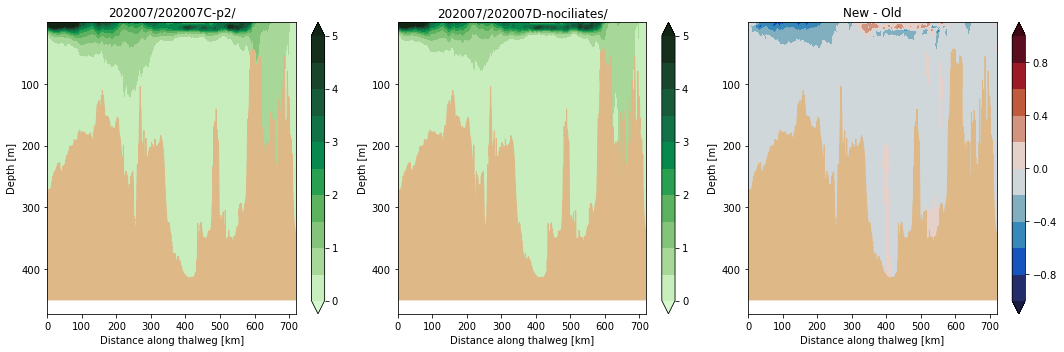

In [212]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

## July : NH4

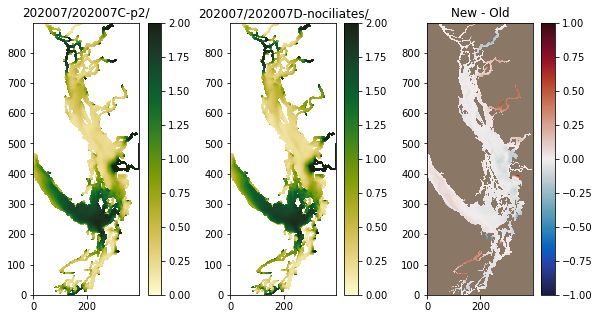

In [146]:
tracer = 'ammonium'
file = 'ptrc'
month = '07'
cmap = cm.speed
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

2.0879940101472645 2.0761161777646953


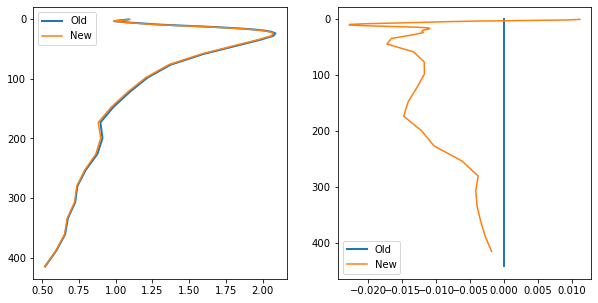

In [147]:
fig = profiles(tracer, file)

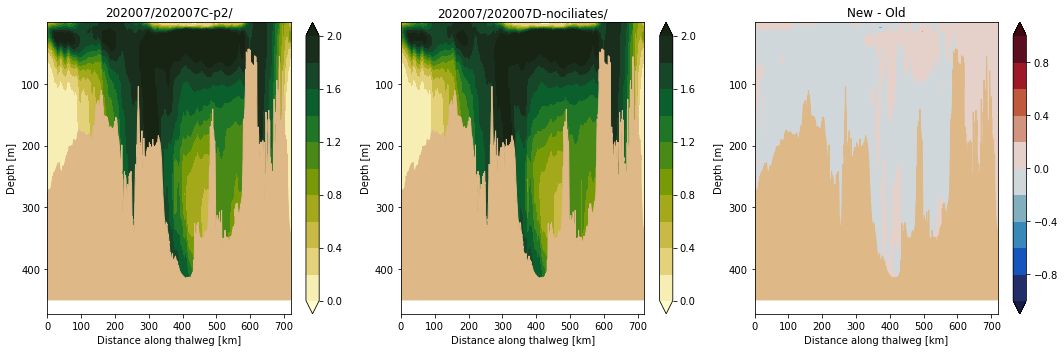

In [148]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## July total Phyto

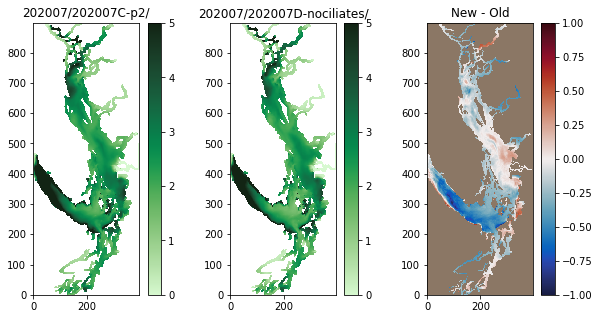

In [213]:
tracer = ['diatoms', 'flagellates', 'ciliates']
file = 'ptrc'
month = '07'
dosum = True
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

3.115459801430424 2.9394222227082016


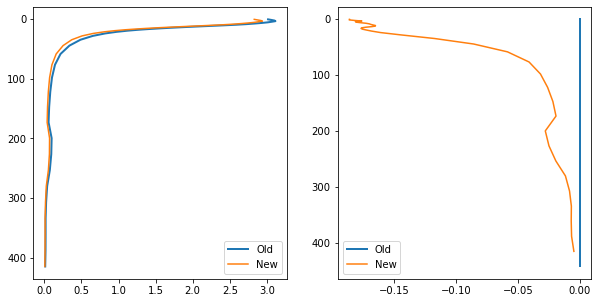

In [214]:
fig = profiles(tracer, file, dosum=dosum)

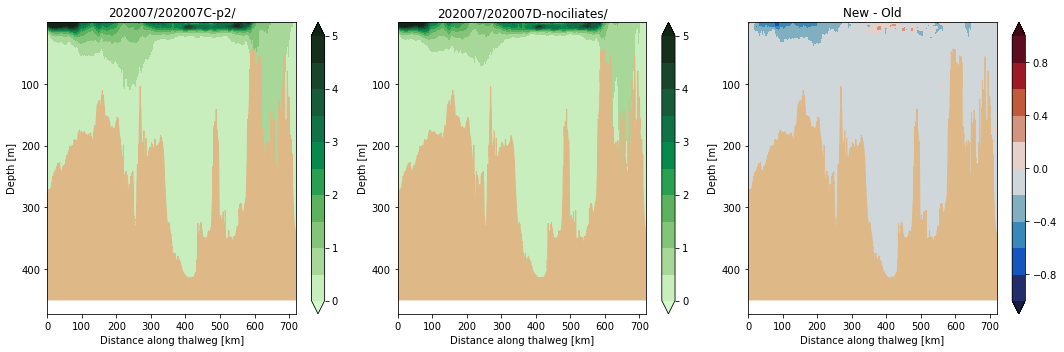

In [215]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

## August: SSH

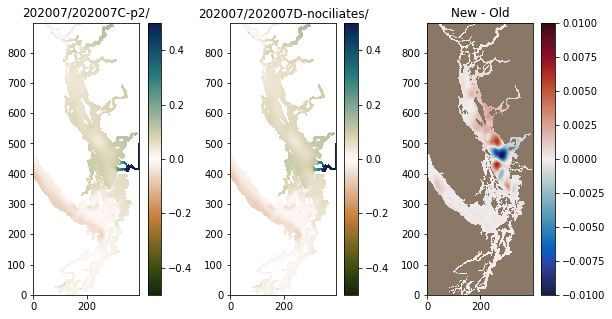

In [149]:
tracer = 'sossheig'
file = 'grid'
month = '08'
cmap = cm.tarn
cdiff = cm.balance
vmax = 0.5
vmin = -0.5
dvmax = 0.01
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, twoD=True)

## August total Phyto

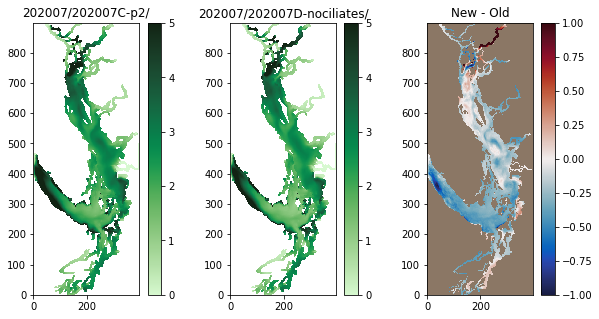

In [216]:
tracer = ['diatoms', 'flagellates', 'ciliates']
file = 'ptrc'
month = '08'
dosum = True
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

2.861183878000546 2.6378088403898485


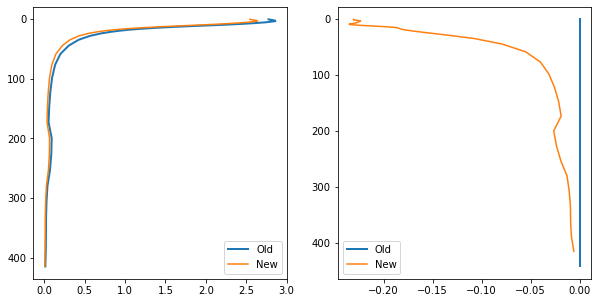

In [217]:
fig = profiles(tracer, file, dosum=dosum)

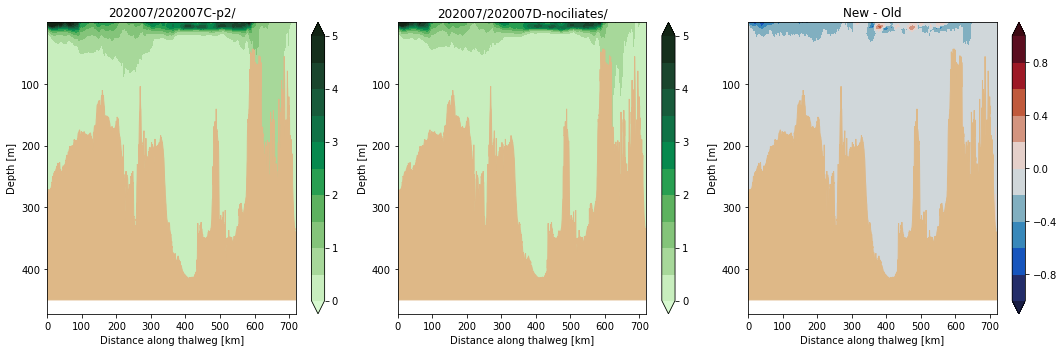

In [218]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

## September: PON

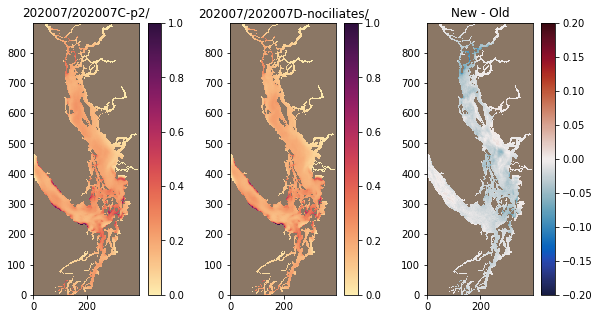

In [154]:
tracer = 'particulate_organic_nitrogen'
file = 'ptrc'
month = '09'
cmap = cm.matter
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.4851271683989322 0.4565640753233758


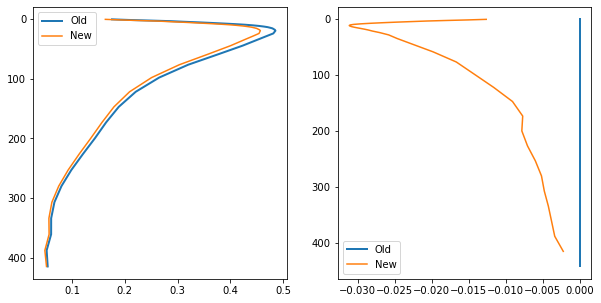

In [155]:
fig = profiles(tracer, file)

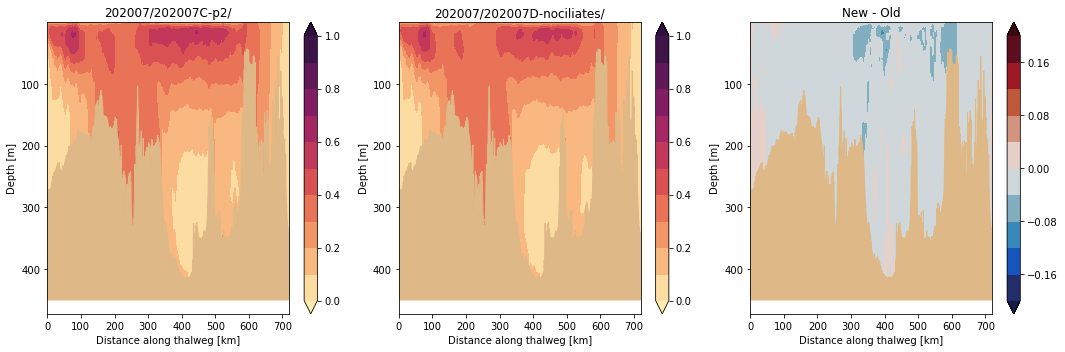

In [156]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## September Diatoms

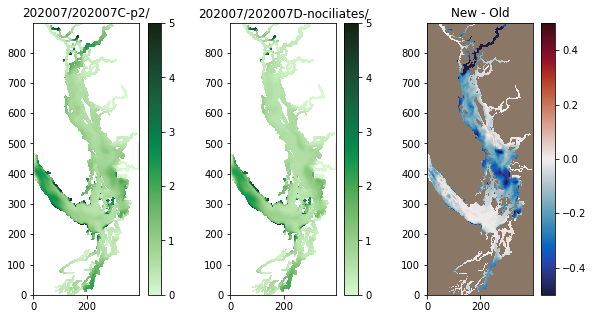

In [166]:
tracer = 'diatoms'
file = 'ptrc'
month = '09'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

1.0545771145557765 0.9293477947613745


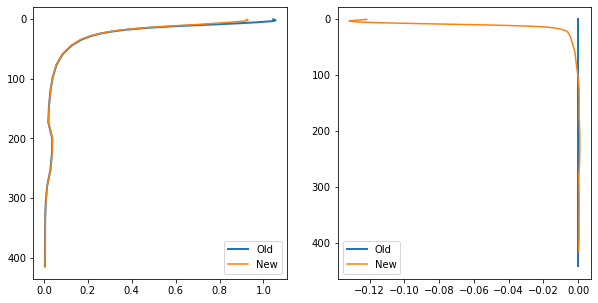

In [167]:
fig = profiles(tracer, file)

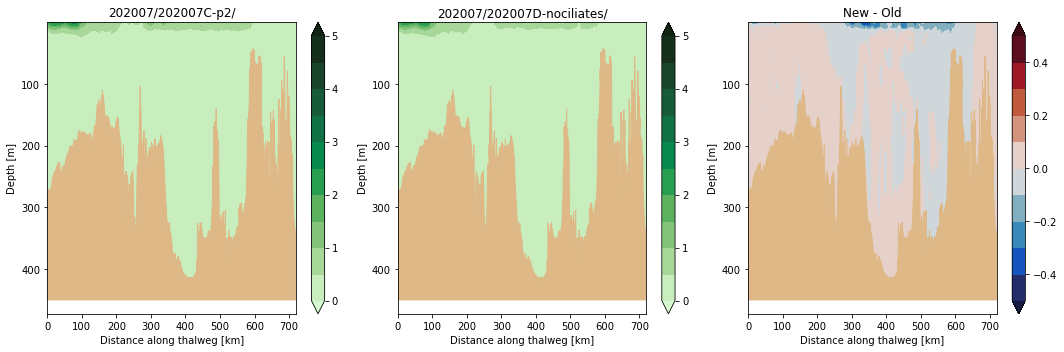

In [168]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## September Flagellates

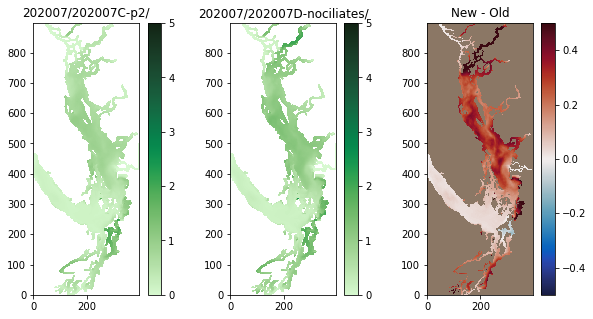

In [160]:
tracer = 'flagellates'
file = 'ptrc'
month = '09'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.4387896899005652 0.612617196224029


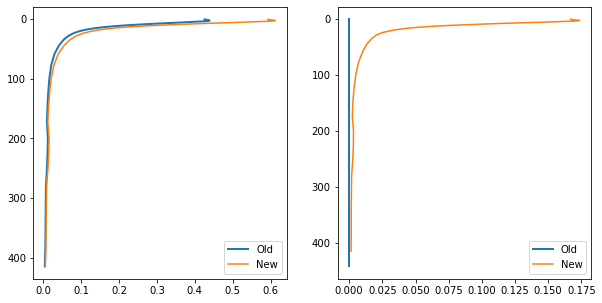

In [161]:
fig = profiles(tracer, file)

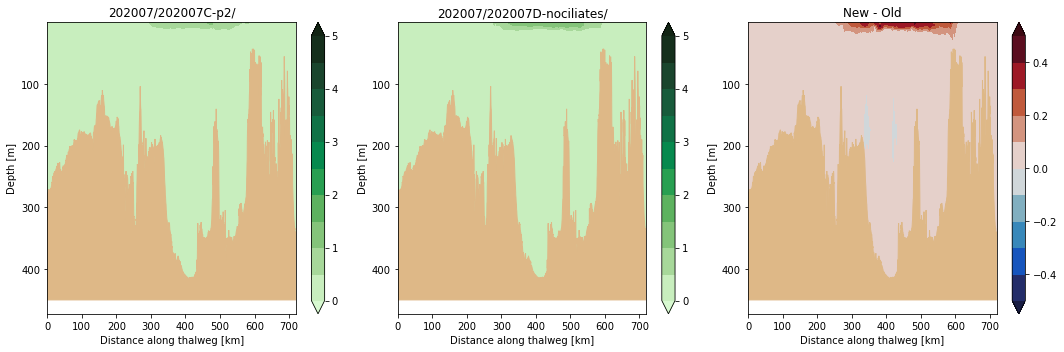

In [162]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## September Ciliates

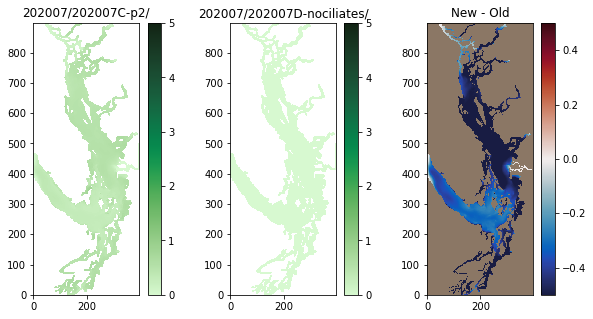

In [169]:
tracer = 'ciliates'
file = 'ptrc'
month = '09'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.3912511039025477 5.031229056660179e-08


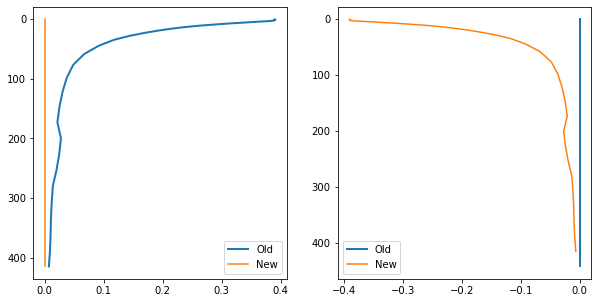

In [170]:
fig = profiles(tracer, file)

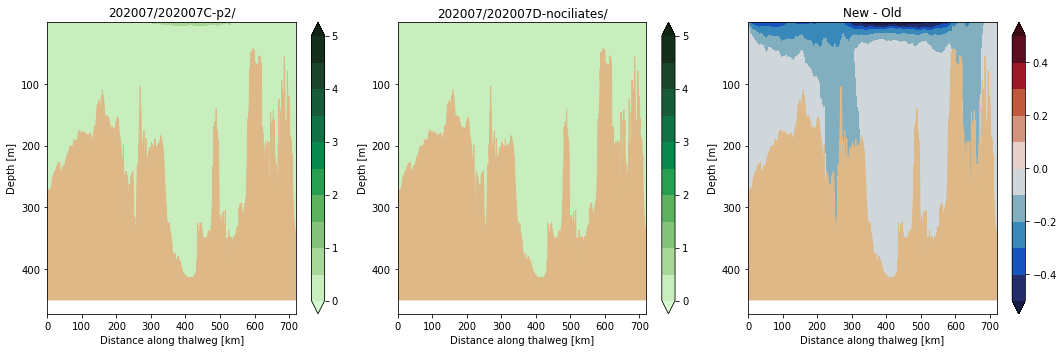

In [171]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## September Total Phyto

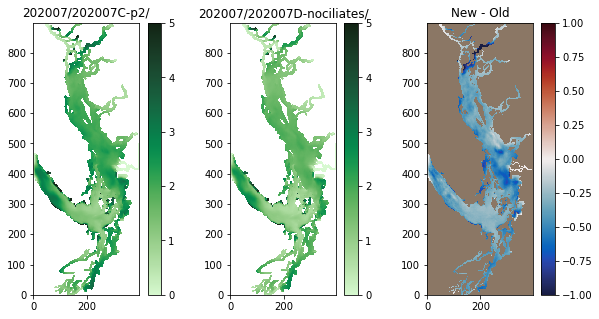

In [221]:
tracer = ['diatoms', 'flagellates', 'ciliates']
file = 'ptrc'
month = '09'
dosum = True
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

1.882089267334533 1.537236881848966


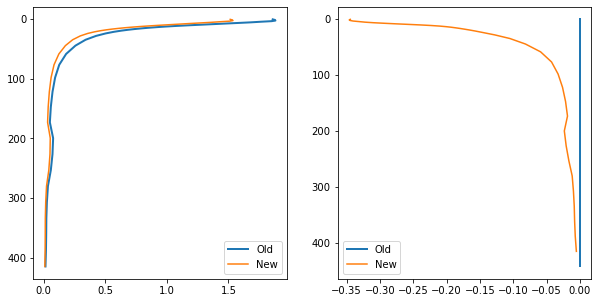

In [222]:
fig = profiles(tracer, file, dosum=dosum)

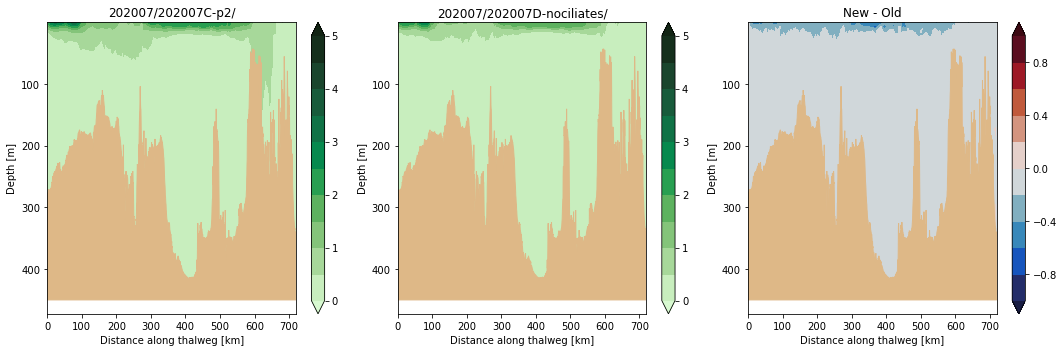

In [223]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

## October: dissolved Silicon

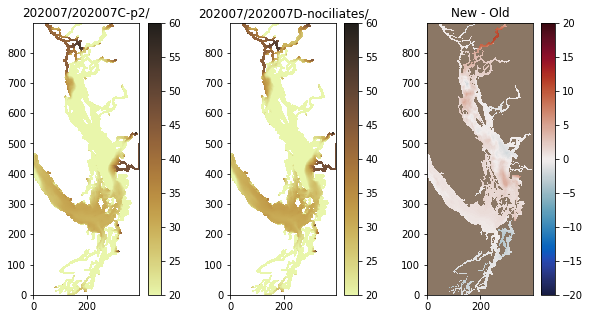

In [224]:
tracer = 'silicon'
file = 'ptrc'
month = '10'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 20
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

74.1539988041662 73.62020153772353


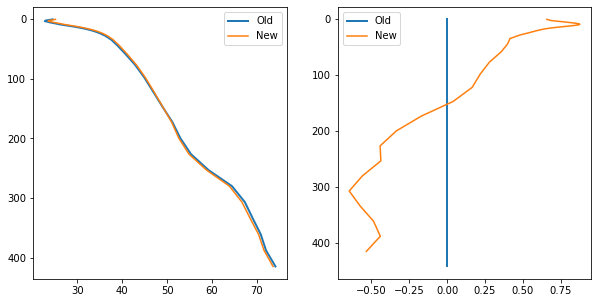

In [225]:
fig = profiles(tracer, file)

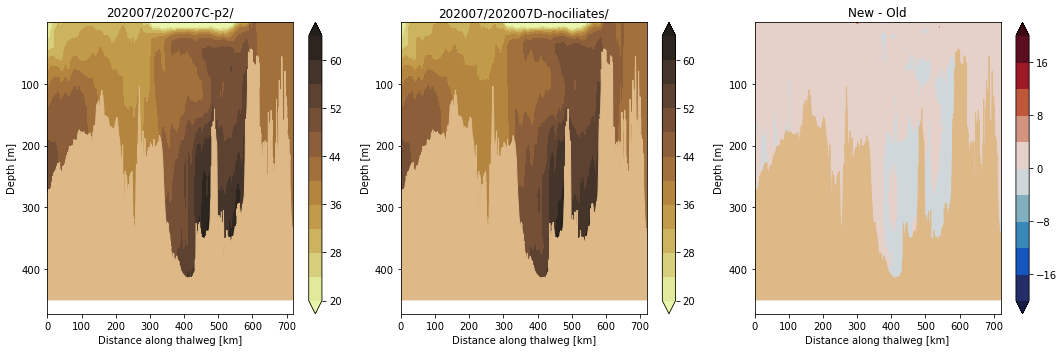

In [226]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## November: DIC

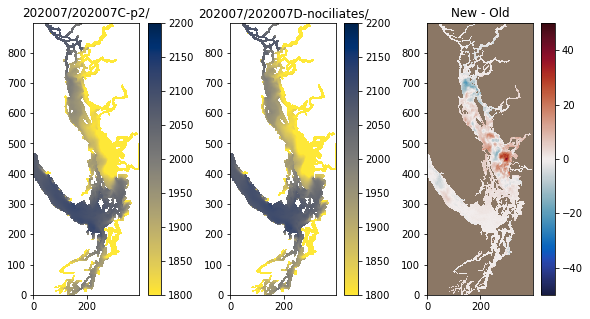

In [227]:
tracer = 'dissolved_inorganic_carbon'
file = 'carp'
month = '11'
cmap = 'cividis_r'
cdiff = cm.balance
vmax = 2200
vmin = 1800
dvmax = 50
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

2177.8675282403956 2178.049731141494


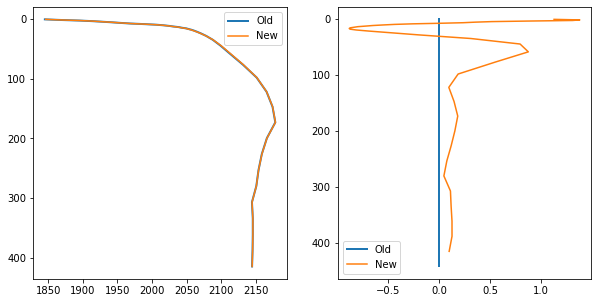

In [228]:
fig = profiles(tracer, file)

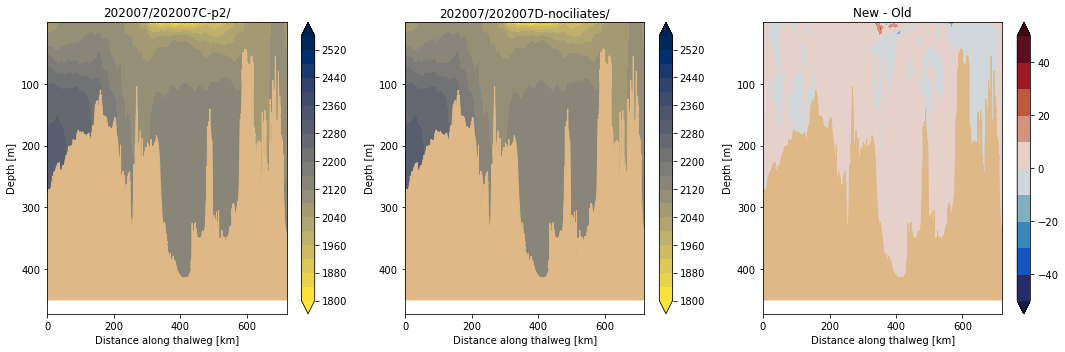

In [229]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## November Nitrate

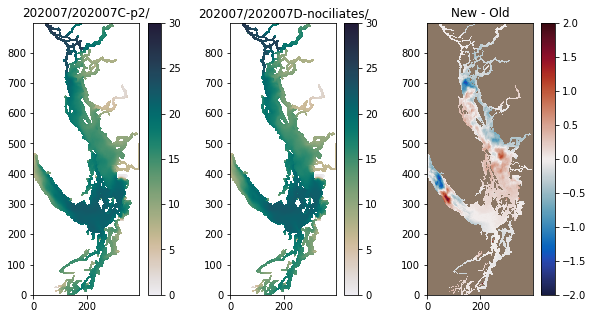

In [230]:
tracer = 'nitrate'
file = 'ptrc'
month = '11'
cmap = cm.rain
cdiff = cm.balance
vmax = 30
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

28.29559630823083 28.315115754042786


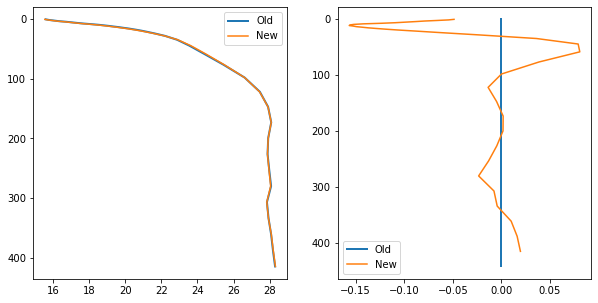

In [231]:
fig = profiles(tracer, file)

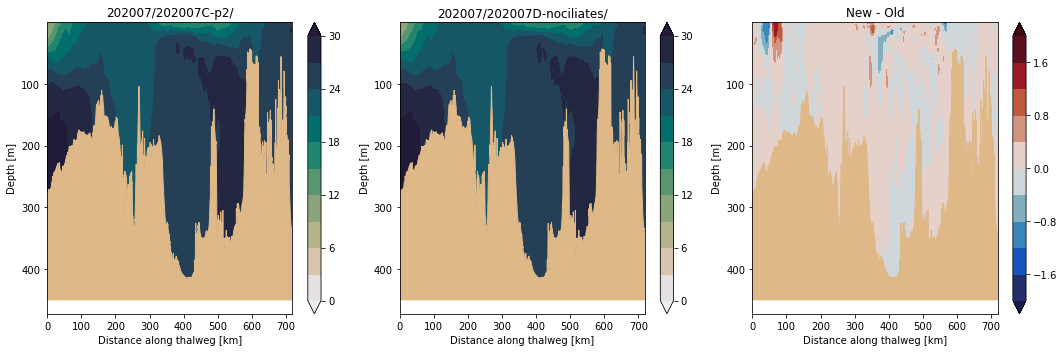

In [232]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## November Nitrate versus H201812

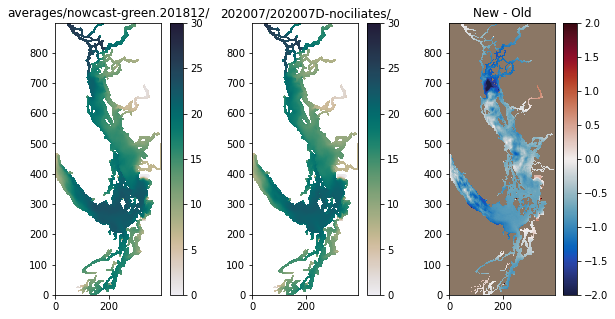

In [233]:
tracer = 'nitrate'
file = 'ptrc'
month = '11'
cmap = cm.rain
cdiff = cm.balance
vmax = 30
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/nowcast-green.201812/')

29.0721563707867 28.315115754042786


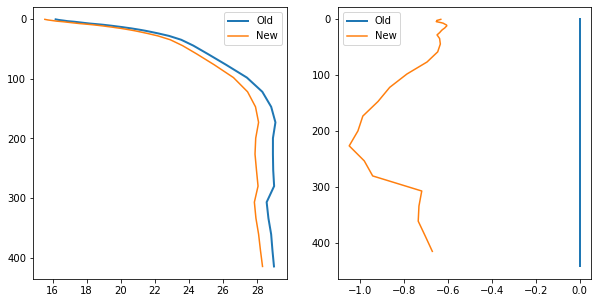

In [234]:
fig = profiles(tracer, file, olddir='averages/nowcast-green.201812/')

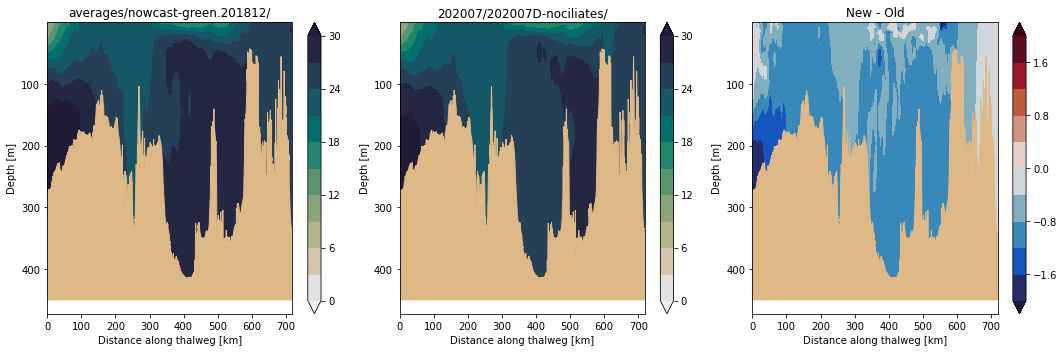

In [235]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/nowcast-green.201812/')

## November Total Phyto

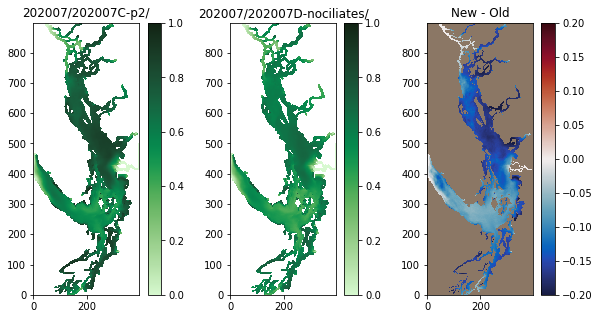

In [240]:
tracer = ['diatoms', 'flagellates', 'ciliates']
file = 'ptrc'
month = '11'
dosum = True
cmap = cm.algae
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

0.6129838367820062 0.512509531324639


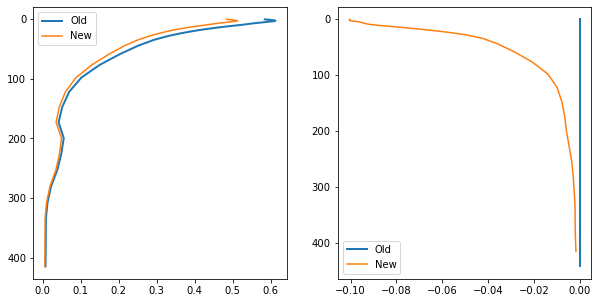

In [241]:
fig = profiles(tracer, file, dosum=dosum)

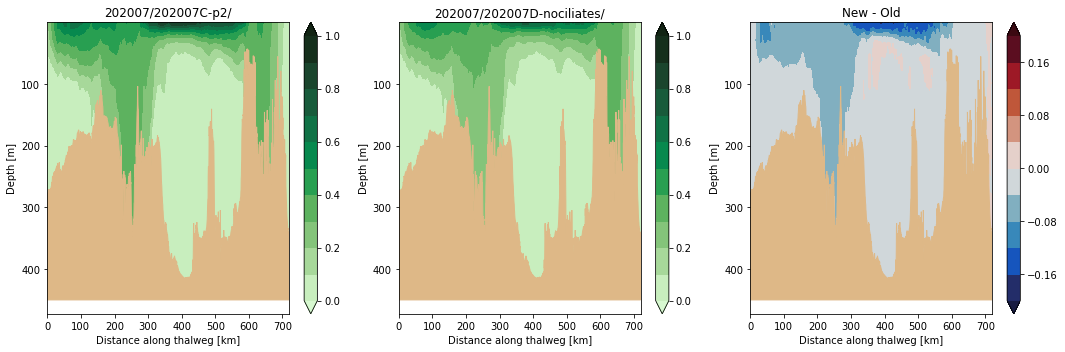

In [242]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, dosum=dosum)

## December Alkalinity

KeyError: 'total_alkalinity'

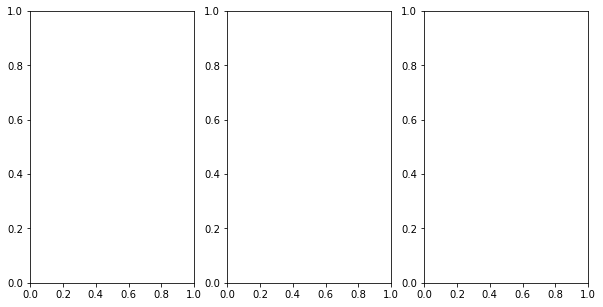

In [236]:
tracer = 'total_alkalinity'
file = 'carp'
month = '12'
cmap = cm.ice_r
cmap.set_bad('#8b7765')
cdiff = cm.balance
vmax = 2300
vmin = 1900
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

In [ ]:
fig = profiles(tracer, file)

KeyError: 'total_alkalinity'

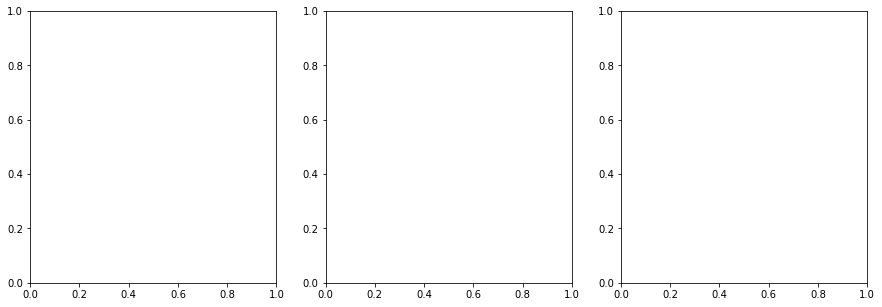

In [237]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## December Fraser Tracer

In [ ]:
tracer = 'Fraser_tracer'
file = 'carp'
month = '12'
cmap = cm.amp
cdiff = cm.balance
vmax = 6
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, dl=3,
                    zoom=[320, 500, 290, 398])

## My Points 

In [ ]:
month = '06'
file = 'ptrc'
olddir='202007/202007C-p2/'
dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')

In [ ]:
dm.diatoms[0, :, 400, :].plot(yincrease=False, cmap='gist_ncar_r');

In [ ]:
jj = 280
plt.plot(dm.diatoms[0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj]-dm.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-220, 0);

In [ ]:
jj = 240
plt.plot(dm.diatoms[0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj]-dm.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-50, 0);

In [ ]:
jj = 245
plt.plot(dm.diatoms[0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj]-dm.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-50, 0);

In [ ]:
jj = 249
plt.plot(dm.diatoms[0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj]-dm.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

In [ ]:
jj = 249
field = 'flagellates'
plt.plot(dm[field][0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj]-dm[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

In [ ]:
jj = 249
field = 'microzooplankton'
plt.plot(dm[field][0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj]-dm[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

In [ ]:
jj = 249
field = 'dissolved_organic_nitrogen'
plt.plot(dm[field][0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj]-dm[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

In [ ]:
jj = 249
field = 'particulate_organic_nitrogen'
plt.plot(dm[field][0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj]-dm[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

In [ ]:
jj = 249
field = 'ammonium'
plt.plot(dm[field][0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj]-dm[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

In [ ]:
jj = 249
field = 'biogenic_silicon'
plt.plot(dm[field][0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj]-dm[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

In [ ]:
jj = 249
field = 'nitrate'
plt.plot(dm[field][0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj]-dm[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

In [ ]:
jj = 249
field = 'silicon'
plt.plot(dm[field][0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj]-dm[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.diatoms[0, :, 400, :]+ds.flagellates[0, :, 400, :]).plot(ax=ax, yincrease=False, cmap='gist_ncar_r');
ax.set_ylim(100, 0);
ax.set_xlim(210, 310);

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.diatoms[0, :, 400, :]+0*ds.flagellates[0, :, 400, :]
-(dm.diatoms[0, :, 400, :]+0*dm.flagellates[0, :, 400, :])).plot(ax=ax, yincrease=False, cmap='bwr'
                                                                );
ax.set_ylim(10, 0);
ax.set_xlim(290, 310);

In [ ]:
jj = 310
plt.plot(dm.diatoms[0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj]-dm.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-50, 0);

In [ ]:
month = '03'
file = 'ptrc'
olddir='202007/202007C-p2/'
dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.diatoms[0, :, 400, :]+ds.flagellates[0, :, 400, :]
-(dm.diatoms[0, :, 400, :]+dm.flagellates[0, :, 400, :])).plot(ax=ax, yincrease=False, 
                                                               cmap='bwr');
ax.set_ylim(10, 0);
ax.set_xlim(290, 310);

In [ ]:
jj = 310
plt.plot(dm.diatoms[0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj]-dm.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-50, 0);

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.diatoms[0, :, 600, :]+ds.flagellates[0, :, 600, :]).plot(ax=ax, yincrease=False, cmap='gist_ncar_r');
ax.set_ylim(100, 0);
ax.set_xlim(120, 160);

In [ ]:
ii = 625
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.diatoms[0, :, ii, :]-dm.diatoms[0, :, ii, :]).plot(ax=ax, yincrease=False, cmap='bwr');
ax.set_ylim(20, 0);
ax.set_xlim(110, 140);

In [ ]:
ii = 625
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.nitrate[0, :, ii, :]/(ds.nitrate[0,:, ii,:] + 2)).plot(ax=ax, yincrease=False, cmap='gist_ncar');
ax.set_ylim(10, 0);
ax.set_xlim(110, 140);

In [ ]:
plt.plot(1.7*np.exp(-(np.arange(4, 20)-4)/20.), -np.arange(4, 20))

In [ ]:
0.8**0.2

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.diatoms[0, :, 600, :]+ds.flagellates[0, :, 600, :]
-(dm.diatoms[0, :, 600, :]+dm.flagellates[0, :, 600, :])).plot(ax=ax, yincrease=False, cmap='bwr', vmax=0.5);
ax.set_ylim(10, 0);
ax.set_xlim(100, 310);

In [ ]:
month = '06'
file = 'ptrc'
olddir='202007/202007C-p2/'
dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.diatoms[0, :, 600, :]+ds.flagellates[0, :, 600, :]
-(dm.diatoms[0, :, 600, :]+dm.flagellates[0, :, 600, :])).plot(ax=ax, yincrease=False, cmap='bwr', vmax=0.5);
ax.set_ylim(10, 0);
ax.set_xlim(100, 310);

In [ ]:
ii = 600
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.nitrate[0, :, ii, :]/(ds.nitrate[0,:, ii,:] + 2)).plot(ax=ax, yincrease=False, cmap='gist_ncar');
ax.set_ylim(10, 0);
ax.set_xlim(100, 310)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.particulate_organic_nitrogen[0, :, 600, :]
-(dm.particulate_organic_nitrogen[0, :, 600, :])).plot(ax=ax, yincrease=False, 
                                                       cmap='bwr');
ax.set_ylim(10, 0);
ax.set_xlim(100, 310);

In [ ]:
ii = 200
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.diatoms[0, :, ii, :]+0*ds.flagellates[0, :, ii, :]
-(dm.diatoms[0, :, ii, :]+0*dm.flagellates[0, :, ii, :])).plot(ax=ax, yincrease=False, cmap='bwr');
ax.set_ylim(15, 0);
ax.set_xlim(225, 389);

In [ ]:
ii = 200
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.microzooplankton[0, :, ii, :]+0*ds.flagellates[0, :, ii, :]
-(dm.microzooplankton[0, :, ii, :]+0*dm.flagellates[0, :, ii, :])).plot(ax=ax, yincrease=False, cmap='bwr', vmax=0.5);
ax.set_ylim(15, 0);
ax.set_xlim(225, 389);

In [172]:
34/1.88

18.085106382978726